## DAV 5400 Final Project


### The Impacts of U.S. News Ranking Indicators and Other Factors on Higher Education Student Enrollment Rate, First-year Retention Rate, and Graduation Rate.

By Qi Sun, Wen Chen, Yunxiang Wang


### I. Introduction

It is important for universities to plan effective strategies on student recruitment. It is also a huge decision for parents and students to decide what university to attend. There are many aspects that every student and family need to consider in making the college decision. Student enrollment rate (yield rate), first-year retention rate, and graduation rate are vitally important measurements of institution’s quality and commitment to student success. These three aspects also indicate if the institution is providing the necessary services and resources to attract students, help students make the transition from high school, and keep students satisfied with their college experience. In the meanwhile, for higher education administrators and leaders, it is significant to have some strong knowledge of factors that influence how students choose universities to study at, wish to continue there and finish their degrees in a timely manner. Student enrollment rate, first-year retention rate, and graduation rate have presented an accurate depiction on if the institution made wise decisions on who will be accepted and be successful at that college, which plays an important role while recruiting new students. 


The U.S. News national university ranking is an important and easy way for parents and students to find the information on all aspects of an institution. More and more institutional leaders are aware of the impact rankings can have on applicants. Therefore, there is a need for institutions to attain a higher ranking by focusing on targeted measures and actions. This study will examine how ranking indictors can influence student enrollment rate, first-year retention rate, and graduation rate, which are listed on the ranking and have attracted the most attention. 

Potential stakeholders in this study include but are not limited to university leaders and deans, and other administrators who are affiliated with the institution. This study will allow potential stakeholders to determine which indictors and areas to be relevant in improving the ranking. 

The purpose of this study is to examine factors that impact and predict higher education student enrollment rate, first-year retention rate, and graduation rate. This study is divided into three parts based on the three dependent variables - student enrollment rate, first-year retention rate, and graduation rate. Each group member is responsible for one part. 


---------------
### II. Data Collection:

There are four datasets used for this study, including three csv files and one json.

1. The first one is U.S.News National University ranking 2019 data, which was downloaded from the U.S. News website. 

2. The second dataset contains admission average SAT score, ACT midpoint score and the average annual total cost of attendance (including tuition and fees, books and supplies, and living expenses), which was accessed via an API provided by the the College Scorecard website.

3. The third dataset (csv) includes grant and scholarship aid data, which was downloaded from the Integrated Postsecondary Education Data System (IPEDS).

4. The fourth dataset (csv) contains the enrollment and admission data, which was downloaded from the Integrated Postsecondary Education Data System (IPEDS).

The unique institution ID is included in each dataset and used to merge all datasets together. 


#### 2a. Data Acquisition

In [1]:
# Import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import requests
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

                          01. First data file

U.S.News National University ranking 2019 data was downloaded from U.S.News website. It is a csv data file. There are a total of 229 obserations with 28 columns in this dataset.

In [2]:
# Load data

ranking = pd.read_csv('https://raw.githubusercontent.com/susanqisun/DAV-5400/master/USnews_ranking.csv')

print(ranking.shape)
ranking.head()


(229, 28)


,rank,school,UNITID,PublicPrivate,OverallScore,PeerAssessmentScore,Highschoolcounselorassessmentscore,Graduationandretentionrank,Averagefirstyearretentionrate,Averagefirstyearretentionratefootnote,...,Studentfacultyratiofootnote,Selectivityrank,SATACT25th75thpercentile,SATACT25th75thpercentilefootnote,Firstyearstudentsintop10ofhighschoolclass,Firstyearstudentsintop10ofhighschoolclassfootnote,Financialresourcesrank,Alumnigivingrank,Averagealumnigivingrate,Averagealumnigivingratefootnote
0,1,Princeton University,186131,private,100,4.9,4.9,5,0.98,NaN,...,NaN,10,1430-1570,NaN,0.91,5.0,10,1,0.59,NaN
1,2,Harvard University,166027,private,96,4.9,4.9,3,0.97,NaN,...,NaN,5,1460-1590,NaN,0.95,5.0,7,9,0.33,NaN
2,3,Columbia University,190150,private,94,4.7,4.8,3,0.99,NaN,...,NaN,5,32-35,NaN,0.96,5.0,13,15,0.30,NaN
3,3,Massachusetts Institute of Technology,166683,private,94,4.9,4.9,21,0.99,NaN,...,NaN,1,1490-1570,NaN,0.98,5.0,1,8,0.34,NaN
4,3,University of Chicago,144050,private,94,4.6,4.7,26,0.99,NaN,...,NaN,1,32-35,NaN,0.99,NaN,7,5,0.40,NaN


                        02. Second data file

We use API to access data on the webpage: https://collegescorecard.ed.gov/data/documentation/ .
A valid API key is required to access the College Scorecard Data. We registered a key at https://api.data.gov/signup for API access. The data available from this website covers a wide range of topics. For the purpose of this study, the fields of school name, ID, state, ACT score midpoint, SAT score average, and cost of attendance were searched. 

Firstly,we used a query URL and the query returned a JSON with two top-level elements: 'metadata' and 'results'. In the metadata field, 'total' is the total number of records matching the query, 'page' is the page number for this result set, 'per_page' is the number of records returned in a single result set. By default, results are returned in pages of 20 records at a time. 


In [3]:
#### Use API to access data

# First try 

# Use API key: Lxc17PDBsZAKpgeJvDezpaY0lZTssun4OswpOkeG
# backup API key: vqkoyd27lhc0pzglmSb9Sew78cQ6aZBr1OeExoWN

url01 = 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,school.state,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores.average.overall,latest.cost.attendance.academic_year&api_key=Lxc17PDBsZAKpgeJvDezpaY0lZTssun4OswpOkeG'
resp01 = requests.get(url01)
resp01


<Response [200]>

In [4]:
# now convert the 'resp' object's JSON content into a list of native Python objects
data01 = resp01.json()

print(type(data01)) # Check data type
print(list(data01.keys())) # Check keys

<class 'dict'>
['metadata', 'results']


In [5]:
# check the content of the list
data01

{'metadata': {'total': 7175, 'page': 0, 'per_page': 20},
 'results': [{'school.name': 'New York Theological Seminary',
   'school.state': 'NY',
   'id': 193894,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat_scores.average.overall': None,
   'latest.cost.attendance.academic_year': None},
  {'school.name': 'Carver Bible College',
   'latest.cost.attendance.academic_year': 21156,
   'school.state': 'GA',
   'id': 139287,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat_scores.average.overall': None},
  {'school.name': 'Strayer University-Florida',
   'latest.cost.attendance.academic_year': 29544,
   'school.state': 'FL',
   'id': 449038,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat_scores.average.overall': None},
  {'school.name': 'Strayer University-Delaware',
   'latest.cost.attendance.academic_year': 29544,
   'school.state': 'DE',
   'id': 450298,
   'latest.admissi

- From the metadata field above, we found that there are 7175 observations (colleges) in total, and I can pull one page at a time. There are 20 records listed on each page.

Next, we need to request data from all pages. We used a function and for loop to pull all query URLs and saved them in 'urllsts'. Then, we used a loop to request results from all pages and saved them in 'datalst'.


In [6]:
# Pull all query URLs using 'page= ' to request each page

def get_urls(n):
    urllst = []
    for i in range(n):
        urllst.append('https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,school.state,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores.average.overall,latest.cost.attendance.academic_year&api_key=Lxc17PDBsZAKpgeJvDezpaY0lZTssun4OswpOkeG&page=%i' % (i))
    return urllst

urllsts = get_urls(360) # manually calculate total pages: 7175/20=359.
urllsts[:5] # Check the first 5 URLs


['https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,school.state,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores.average.overall,latest.cost.attendance.academic_year&api_key=Lxc17PDBsZAKpgeJvDezpaY0lZTssun4OswpOkeG&page=0',
 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,school.state,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores.average.overall,latest.cost.attendance.academic_year&api_key=Lxc17PDBsZAKpgeJvDezpaY0lZTssun4OswpOkeG&page=1',
 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,school.state,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores.average.overall,latest.cost.attendance.academic_year&api_key=Lxc17PDBsZAKpgeJvDezpaY0lZTssun4OswpOkeG&page=2',
 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,school.state,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores

In [7]:
### This step would take 5 minutes or more to get results!!!!


# Pull results from all pages

datalst = []

for i in range(360):
    url = urllsts[i]
    resp = requests.get(url)
    data = resp.json()
    data02 = data['results']
    datalst.append(data02)     

datalst[:3] # Check the first 3 (dicts) from the nested list


[[{'school.name': 'New York Theological Seminary',
   'school.state': 'NY',
   'id': 193894,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat_scores.average.overall': None,
   'latest.cost.attendance.academic_year': None},
  {'school.name': 'Carver Bible College',
   'latest.cost.attendance.academic_year': 21156,
   'school.state': 'GA',
   'id': 139287,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat_scores.average.overall': None},
  {'school.name': 'Strayer University-Florida',
   'latest.cost.attendance.academic_year': 29544,
   'school.state': 'FL',
   'id': 449038,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat_scores.average.overall': None},
  {'school.name': 'Strayer University-Delaware',
   'latest.cost.attendance.academic_year': 29544,
   'school.state': 'DE',
   'id': 450298,
   'latest.admissions.act_scores.midpoint.cumulative': None,
   'latest.admissions.sat

In [8]:
# Extract the components of the dict object from 'datalst'
n=[y for x in datalst for y in x]

# Convert the extracted JSON data into a data frame 
scorecard = pd.DataFrame(n)
scorecard.iloc[:5] # Check the fist five records


,id,latest.admissions.act_scores.midpoint.cumulative,latest.admissions.sat_scores.average.overall,latest.cost.attendance.academic_year,school.name,school.state
0,193894,NaN,NaN,NaN,New York Theological Seminary,NY
1,139287,NaN,NaN,21156.0,Carver Bible College,GA
2,449038,NaN,NaN,29544.0,Strayer University-Florida,FL
3,450298,NaN,NaN,29544.0,Strayer University-Delaware,DE
4,457332,NaN,NaN,NaN,European Academy of Cosmetology and Hairdressing,CT


In [9]:
# Check column names
scorecard.columns

Index(['id', 'latest.admissions.act_scores.midpoint.cumulative',
       'latest.admissions.sat_scores.average.overall',
       'latest.cost.attendance.academic_year', 'school.name', 'school.state'],
      dtype='object')

In [10]:
# Change column names
scorecard.columns =['UNITID','Admissions.ACT.midpoint.cumulative','Admissions.SAT.avg','Cost.Academic_year',
            'INSTNM','State']

print(scorecard.shape)
scorecard.head()

(7175, 6)


,UNITID,Admissions.ACT.midpoint.cumulative,Admissions.SAT.avg,Cost.Academic_year,INSTNM,State
0,193894,NaN,NaN,NaN,New York Theological Seminary,NY
1,139287,NaN,NaN,21156.0,Carver Bible College,GA
2,449038,NaN,NaN,29544.0,Strayer University-Florida,FL
3,450298,NaN,NaN,29544.0,Strayer University-Delaware,DE
4,457332,NaN,NaN,NaN,European Academy of Cosmetology and Hairdressing,CT



There are a total of 7175 ovservations with 6 columns in this dataset. Not all colleges will be used for the purpose of this study.



                          03. Third data file
                            
The third dataset is a csv file and was downloaded from IPEDS website. This dataset contains data on student financial aid, 2016-17. There are 6394 colleges and 647 columns in this dataset. The columns of the unique institution ID(UNITID) and the total amount of grant and scholarship aid awarded were extracted and used for the purpose of this study.


In [11]:
# Load data 
aid = pd.read_csv('https://raw.githubusercontent.com/susanqisun/DAV-5400/master/sfa1617.csv')

print(aid.shape)
aid.head()

(6394, 647)


,UNITID,XSCUGRAD,SCUGRAD,XSCUGFFN,SCUGFFN,XSCUGFFP,SCUGFFP,XSCFA2,SCFA2,XSCFA1N,...,XNPT410,NPT410,XNPT420,NPT420,XNPT430,NPT430,XNPT440,NPT440,XNPT450,NPT450
0,100654,R,4851,R,1410.0,R,29.0,R,4851.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
1,100663,R,12369,R,1948.0,R,16.0,R,12369.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
2,100690,R,294,R,4.0,R,1.0,R,294.0,R,...,R,8453.0,R,12133.0,A,NaN,A,NaN,A,NaN
3,100706,R,6507,R,1203.0,R,18.0,R,6507.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN
4,100724,R,4727,R,1143.0,R,24.0,R,4727.0,R,...,A,NaN,A,NaN,A,NaN,A,NaN,A,NaN


In [12]:
# Check column names

print(aid.columns)

Index(['UNITID', 'XSCUGRAD', 'SCUGRAD', 'XSCUGFFN', 'SCUGFFN', 'XSCUGFFP',
       'SCUGFFP', 'XSCFA2', 'SCFA2', 'XSCFA1N',
       ...
       'XNPT410', 'NPT410', 'XNPT420', 'NPT420', 'XNPT430', 'NPT430',
       'XNPT440', 'NPT440', 'XNPT450', 'NPT450  '],
      dtype='object', length=647)


In [13]:
# Extract two columns
df_aid = aid.loc[:, ['UNITID','GRNTT2']].copy()

# Change column names
df_aid.columns = ['UNITID','scholarship']

df_aid.head()

,UNITID,scholarship
0,100654,NaN
1,100663,NaN
2,100690,16461.0
3,100706,NaN
4,100724,NaN


                           04. Fourth data file

The fourth dataset is a csv file and was downloaded from IPEDS. This dataset includes admission considerations, applications, admissions, and enrollees, fall 2017. There are 2075 observations with 68 columns in this dataset. The total number of admission and enrollment were used.


In [14]:
# Load data
enroll = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-5400/master/adm2017.csv")

print(enroll.shape)
enroll.head()


(2075, 68)


,UNITID,ADMCON1,ADMCON2,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,...,XACTCM75,ACTCM75,XACTEN25,ACTEN25,XACTEN75,ACTEN75,XACTMT25,ACTMT25,XACTMT75,ACTMT75
0,100654,1,2,1,2,3,2,1,1,3,...,R,19.0,R,14.0,R,20.0,R,15.0,R,18.0
1,100663,1,3,1,1,3,3,1,3,3,...,R,28.0,R,22.0,R,31.0,R,21.0,R,26.0
2,100706,1,2,1,1,3,2,1,1,3,...,R,31.0,R,25.0,R,33.0,R,24.0,R,29.0
3,100724,1,3,2,3,3,3,1,1,3,...,R,20.0,R,15.0,R,19.0,R,14.0,R,19.0
4,100751,1,2,1,1,3,3,1,1,3,...,R,32.0,R,23.0,R,33.0,R,21.0,R,29.0


In [15]:
# Extract 3 columns

df_enroll = enroll.loc[:, ['UNITID','ADMSSN','ENRLT']].copy()
df_enroll.head()

,UNITID,ADMSSN,ENRLT
0,100654,7772.0,1294.0
1,100663,6936.0,2299.0
2,100706,3618.0,1352.0
3,100724,6696.0,967.0
4,100751,20321.0,7407.0


                       05. Merge all datasets together

Merge datasets of ranking, df_aid, df_enroll and scorecard together.


In [16]:
result = (ranking.merge(df_aid, on='UNITID')
                    .merge(df_enroll, on='UNITID')
                    .merge(scorecard, on='UNITID'))

result.head() # Check the first 5 observations


,rank,school,UNITID,PublicPrivate,OverallScore,PeerAssessmentScore,Highschoolcounselorassessmentscore,Graduationandretentionrank,Averagefirstyearretentionrate,Averagefirstyearretentionratefootnote,...,Averagealumnigivingrate,Averagealumnigivingratefootnote,scholarship,ADMSSN,ENRLT,Admissions.ACT.midpoint.cumulative,Admissions.SAT.avg,Cost.Academic_year,INSTNM,State
0,1,Princeton University,186131,private,100,4.9,4.9,5,0.98,NaN,...,0.59,NaN,37364482.0,1990.0,1306.0,34.0,1493.0,61860.0,Princeton University,NJ
1,2,Harvard University,166027,private,96,4.9,4.9,3,0.97,NaN,...,0.33,NaN,46478712.0,2037.0,1687.0,34.0,1506.0,64400.0,Harvard University,MA
2,3,Columbia University,190150,private,94,4.7,4.8,3,0.99,NaN,...,0.30,NaN,37331094.0,2519.0,1547.0,34.0,1496.0,69021.0,Columbia University in the City of New York,NY
3,3,Massachusetts Institute of Technology,166683,private,94,4.9,4.9,21,0.99,NaN,...,0.34,NaN,28024514.0,1452.0,1097.0,34.0,1519.0,63250.0,Massachusetts Institute of Technology,MA
4,3,University of Chicago,144050,private,94,4.6,4.7,26,0.99,NaN,...,0.40,NaN,35193269.0,2419.0,1736.0,34.0,1508.0,70100.0,University of Chicago,IL


In [18]:
######### combined dataset 
# Make a copy

df = result.copy()


#### 2b. Data Preparation

Step 1: The column of 'Studentfacultyratio' is separated.

Step 2: We delete the columns that are not meaningful for this study, such as Averagefirstyearretentionratefootnote and Firstyearstudentsintop10ofhighschoolclassfootnote. For the column of SATACT25th75thpercentile, we already have the columns of SAT average score and ACT score midpoint so that we decided to delete SATACT25th75thpercentile.

Step 3: We check the data type, unique value and missing value, and fill the missing value.


##### Step 1: Separate a column

In [19]:
# Check the first 5 rows of the column of 'Studentfacultyratio'
df['Studentfacultyratio'].head()


0    5 to 1
1    6 to 1
2    6 to 1
3    3 to 1
4    5 to 1
Name: Studentfacultyratio, dtype: object

In [20]:
# For column 'Studentfacultyratio', extract the first integer and create a new column named 'S_F_Ratio'
df['Stu_Fac_Ratio'] = df['Studentfacultyratio'].str.extract('(\d+)')

# Convert data in column 'Stu_Fac_Ratio' from string to int
df['Stu_Fac_Ratio'] = pd.to_numeric(df['Stu_Fac_Ratio'], downcast='integer')

df['Stu_Fac_Ratio'].head()


0    5
1    6
2    6
3    3
4    5
Name: Stu_Fac_Ratio, dtype: int8

In [21]:
print('The shape of the dataset before delete', df.shape)

# Drop this column
df = df.drop(['Studentfacultyratio'], axis=1)

print('The shape of the dataset after delete', df.shape)


The shape of the dataset before delete (229, 37)
The shape of the dataset after delete (229, 36)


##### Step 2: Delete  columns that are not used

In [22]:
# Delete 10 columns

print('The shape of the dataset before delete', df.shape)

df = df.drop(["Averagefirstyearretentionratefootnote", "Actualgraduationratefootnote", 
              "Studentfacultyratiofootnote",'SATACT25th75thpercentilefootnote',
              'Firstyearstudentsintop10ofhighschoolclassfootnote','INSTNM',
              'Averagealumnigivingratefootnote','OverUnderperformance',
              'Predictedgraduationrate','SATACT25th75thpercentile'], axis=1)

print('The shape of the dataset after delete', df.shape)


The shape of the dataset before delete (229, 36)
The shape of the dataset after delete (229, 26)


##### Step 3: Check data types, missing values, unique value, zero values, '?' values.

In [23]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
rank,int64,61,0,229,0,0
school,object,229,0,229,0,0
UNITID,int64,229,0,229,0,0
PublicPrivate,object,2,0,229,0,0
OverallScore,int64,61,0,229,0,0
PeerAssessmentScore,float64,33,0,229,0,0
Highschoolcounselorassessmentscore,float64,22,0,229,0,0
Graduationandretentionrank,int64,62,0,229,0,0
Averagefirstyearretentionrate,float64,30,0,229,0,0
Actualgraduationrate,float64,53,0,229,0,0


In [116]:
# make a copy of original dataset and fill the missing value
df01=df.copy()

# missing value forward-fill
# I'm using forward fill because data is in order. 
# I would assume university close to others in SAT/ACT have similar values.
df01['Admissions.SAT.avg'] = df01['Admissions.SAT.avg'].fillna(method='ffill')
df01['Admissions.ACT.midpoint.cumulative'] = df01['Admissions.ACT.midpoint.cumulative'].fillna(method='ffill')


In [117]:
# Check column information
df01.info()
#### Final dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 26 columns):
rank                                         229 non-null int64
school                                       229 non-null object
UNITID                                       229 non-null int64
PublicPrivate                                229 non-null object
OverallScore                                 229 non-null int64
PeerAssessmentScore                          229 non-null float64
Highschoolcounselorassessmentscore           229 non-null float64
Graduationandretentionrank                   229 non-null int64
Averagefirstyearretentionrate                229 non-null float64
Actualgraduationrate                         229 non-null float64
Facultyresourcesrank                         229 non-null int64
Percentofclassesunder20                      229 non-null float64
Percentofclassesof50ormorestudents           229 non-null float64
Selectivityrank                              229 

In [26]:
# Describe for Numerical Columns
df01.describe()

,rank,UNITID,OverallScore,PeerAssessmentScore,Highschoolcounselorassessmentscore,Graduationandretentionrank,Averagefirstyearretentionrate,Actualgraduationrate,Facultyresourcesrank,Percentofclassesunder20,...,Selectivityrank,Financialresourcesrank,Alumnigivingrank,scholarship,ADMSSN,ENRLT,Admissions.ACT.midpoint.cumulative,Admissions.SAT.avg,Cost.Academic_year,Stu_Fac_Ratio
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,9.700000e+01,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,113.065502,177588.991266,50.545852,3.095633,3.773362,114.807860,0.871703,0.721747,123.816594,0.471616,...,120.676856,117.685590,119.615721,3.041526e+07,10911.930131,3055.148472,27.043668,1205.593886,38253.851528,14.834061
std,65.608021,43212.823199,17.810500,0.708766,0.500997,69.367239,0.071648,0.139622,78.718639,0.148183,...,77.000116,72.951359,75.579927,1.865424e+07,7315.433873,2084.732522,3.458757,137.682849,17431.423463,4.660253
min,1.000000,100663.000000,26.000000,1.700000,2.800000,1.000000,0.670000,0.390000,1.000000,0.170000,...,1.000000,1.000000,1.000000,2.621764e+06,568.000000,201.000000,19.000000,907.000000,16078.000000,3.000000
25%,56.000000,144050.000000,36.000000,2.600000,3.400000,55.000000,0.820000,0.610000,58.000000,0.360000,...,57.000000,56.000000,57.000000,1.727713e+07,4701.000000,1420.000000,24.000000,1091.000000,23818.000000,12.000000
50%,115.000000,180461.000000,48.000000,3.000000,3.700000,112.000000,0.870000,0.710000,117.000000,0.450000,...,112.000000,115.000000,110.000000,2.759615e+07,9673.000000,2653.000000,27.000000,1185.000000,29626.000000,16.000000
75%,171.000000,209542.000000,61.000000,3.500000,4.100000,170.000000,0.930000,0.830000,183.000000,0.570000,...,177.000000,166.000000,168.000000,4.091980e+07,15349.000000,4242.000000,29.000000,1289.000000,56701.000000,18.000000
max,226.000000,445188.000000,100.000000,4.900000,4.900000,275.000000,0.990000,0.970000,293.000000,0.910000,...,292.000000,296.000000,278.000000,8.670877e+07,31878.000000,11639.000000,35.000000,1555.000000,70100.000000,30.000000


In the dataset (df01), there are a total of 229 observations with 26 variables. Each row is one  university with each column containing a different characteristic. There are 229 universitites on the U.S.News ranking 2019, ranked from 1 to 226. The column of OverallScore indicates the rank, the highest overall score the highest rank. The highest overall score is 100 and the lowest score is 26.


Three columns have missing values, they are: scholarship, Admissions.ACT.midpoint.cumulative, and Admissions.SAT.avg. There are 132 missing values in the column of scholarship. Such information may not be available now. Therefore, we are not able to fill the missing value of scholarship at this moment. For the missing values of coulmns of  Admissions.ACT.midpoint.cumulative and Admissions.SAT.avg, we use a forward-fill method.


------------------
### III. Student Enrollment Rate (Yield Rate)
-By Qi Sun

#### 3.1: Introduction and Literature Reviews

In recent years, the higher education institutions are confronted with the challenges of the decrease in student enrollments and high competition for these students among institutions. On the one hand, students apply to more schools, which can increase the options when it’s time to make a decision. On the other hand, universities have found it challenging to boost their enrollment rates - the percentage of students who enroll at a university after being accepted. Factors that influence the decisions of students to choose universities to study at vary from student to student. It is important for institutions to know factors that influence students’ choices. U.S.News national university ranking gives parents and students an important clue about how well a school is doing.

Based on U.S.News data, Harvard University had the highest enrollment rate with 82.8% for Fall 2017 among all ranked national universities in the country. Keling (2007) stated that the most influential factor that students will evaluate in selecting their choice of institution was reputation of the institution. However, from the article of “National Universities Where Most Accepted Students Enroll” published on U.S. News website, there are 24 universities reporting a minimum enrollment rate of 50% for fall 2017. Among them, Brigham Young University (Provo), ranked the third highest rate, has a 80.7% enrollment rate, and Yeshiva university ranked 21st has a 53% enrollment rate. It seems that for some universities the ranking did not weaken their enrollment rates. In addition, tuition and other cost during the college plays a signifant role for parents and students to make a decision. Furthermore, most students prefer a small class size at institution. At some large universities, classrooms can hold 300 students or more, which can be overwhelming for many students. Small class sizes make students have more opportunities to ask questions, contribute to discussions and get to know their professors. Lastly, the student to faculty ratio would be another consideration. Parents and students would like a small student to faculty ratio, so that students can get more attention from the faculty. 

The purpose of this part was to examine factors that impact and predict higher education student enrollment rate. These factors are used as independent variables.

This part of the study was guided by the following research questions:

1. What statistically significant association exits between independent variables and the enrollment rate?

2. To what extent does independent variables predict the enrollment rate?

There are 5 independent variables, they are:

1. OverallScore: the overall score for the ranking, range from 1 to 100, numerical variable.

2. Percentofclassesunder20: percent of class under 20 students in the university, numerical variable.

3. Stu_Fac_Ratio: how many students for every one teacher, numerical variable.

4. Cost.Academic_year: the average annual total cost of attendance (including tuition and fees, books and supplies, and living expenses), numerical variable.

5. PublicPrivate: it indicates the type of university, public or private, categorical variable.

The dependent variables is enroll_rate, which is calculated using the total admission number and the total of enrollment number. Both of these two values were collected from IPEDS. 

enroll_rate = enrollment number/admission number, numerical variable. 

Reference:

(1)	https://www.usnews.com/education/best-colleges/articles/how-us-news-calculated-the-rankings

(2)	https://www.chronicle.com/blogs/next/2013/05/19/graduation-rates-flawed-as-a-measure-of-colleges-but-still-useful/

(3)	https://www.valuecolleges.com/rankings/best-value-colleges/


#### 3.2: Exploratory Data Analysis

I created a subset including the variables that were required by this part. I used a math formula to create a new variable called 'enroll_rate', so enroll_rate = ENRLT/ADMSSN.



In [27]:
# Create a subset for the research of Enrollment Rate

df02 = df01[['rank','school','UNITID','ADMSSN','ENRLT',
      'PublicPrivate','OverallScore','State',
      'Percentofclassesunder20','Stu_Fac_Ratio','Cost.Academic_year']]

# make a copy
df03= df02.copy()

# Create the dependent variable
df03['enroll_rate'] = df03['ENRLT']/df03['ADMSSN']

# remove 3 columns that will not be used
df_new = df03.drop(['ENRLT','ADMSSN','rank'], axis=1)

df_new.head(10) # check the fisrt ten observations


,school,UNITID,PublicPrivate,OverallScore,State,Percentofclassesunder20,Stu_Fac_Ratio,Cost.Academic_year,enroll_rate
0,Princeton University,186131,private,100,NJ,0.76,5,61860.0,0.656281
1,Harvard University,166027,private,96,MA,0.73,6,64400.0,0.828179
2,Columbia University,190150,private,94,NY,0.82,6,69021.0,0.614133
3,Massachusetts Institute of Technology,166683,private,94,MA,0.70,3,63250.0,0.755510
4,University of Chicago,144050,private,94,IL,0.80,5,70100.0,0.717652
5,Yale University,130794,private,94,CT,0.73,6,66445.0,0.693456
6,Stanford University,243744,private,93,CA,0.68,4,64477.0,0.815348
7,Duke University,198419,private,92,NC,0.71,6,67005.0,0.536032
8,University of Pennsylvania,215062,private,92,PA,0.68,6,66800.0,0.653713
9,Johns Hopkins University,162928,private,90,MD,0.74,7,65473.0,0.417034


#### 3.2a Histogram of Enrollment Rate

The Figure 1.1 below was created using matplotlib. From this plot, the enrollment rates between 0.2 and 0.4 were quite frequent. The smallest number of enrollment rate was about 9.6% and the largest was about 82.8%. The histogram is slightly skewed to the right, or positively skewed.

[count    229.000000
mean       0.307495
std        0.135256
min        0.095549
25%        0.210701
50%        0.285688
75%        0.366918
max        0.828179
Name: enroll_rate, dtype: float64]


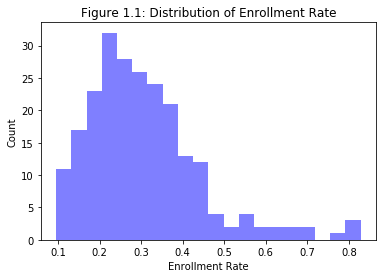

In [29]:
# Histogram of Enrollment Rate

plt.hist(df_new['enroll_rate'], bins = 20,facecolor='blue', alpha=0.5)
plt.xlabel('Enrollment Rate')
plt.ylabel('Count')
plt.title('Figure 1.1: Distribution of Enrollment Rate')

print([df_new['enroll_rate'].describe()])

#### 3.2b University by state 

For the total number of universities by state ranked on U.S.News, the top 10 were selected and used to construct a dataframe. From the results, California and New York State are the top two states that have the most universitites ranked on U.S.News.   

For the mean of enrollment rates by state, the top 10 were shown in the dataframe. Alaska State  and Nebraska are the top two states that have the highest mean of enrollment rates on U.S.News.   


In [30]:
top_state=df_new.groupby(['State'])['UNITID'].count()
top_state=pd.DataFrame(top_state.sort_values(ascending = False).T.head(10))
top_state

,UNITID
State,
CA,22
NY,21
MA,15
PA,12
TX,11
IL,10
FL,9
OH,8
VA,8


In [31]:
top_state01=df_new.groupby(['State'])['enroll_rate'].mean()
top_state01=pd.DataFrame(top_state01.sort_values(ascending = False).T.head(10))
top_state01

,enroll_rate
State,
AK,0.642686
NE,0.509716
UT,0.463820
ND,0.445799
NV,0.425733
SD,0.423588
WY,0.406812
NM,0.404763
RI,0.397827


#### 3.2c Plots for Independent Variables

As shown in Figure 1.2 below, there are more public universities than private ones ranked on the U.S.News. Figure 1.3 shows that the overall scores for each university, which is a representation of the ranking. 

<IPython.core.display.Javascript object>


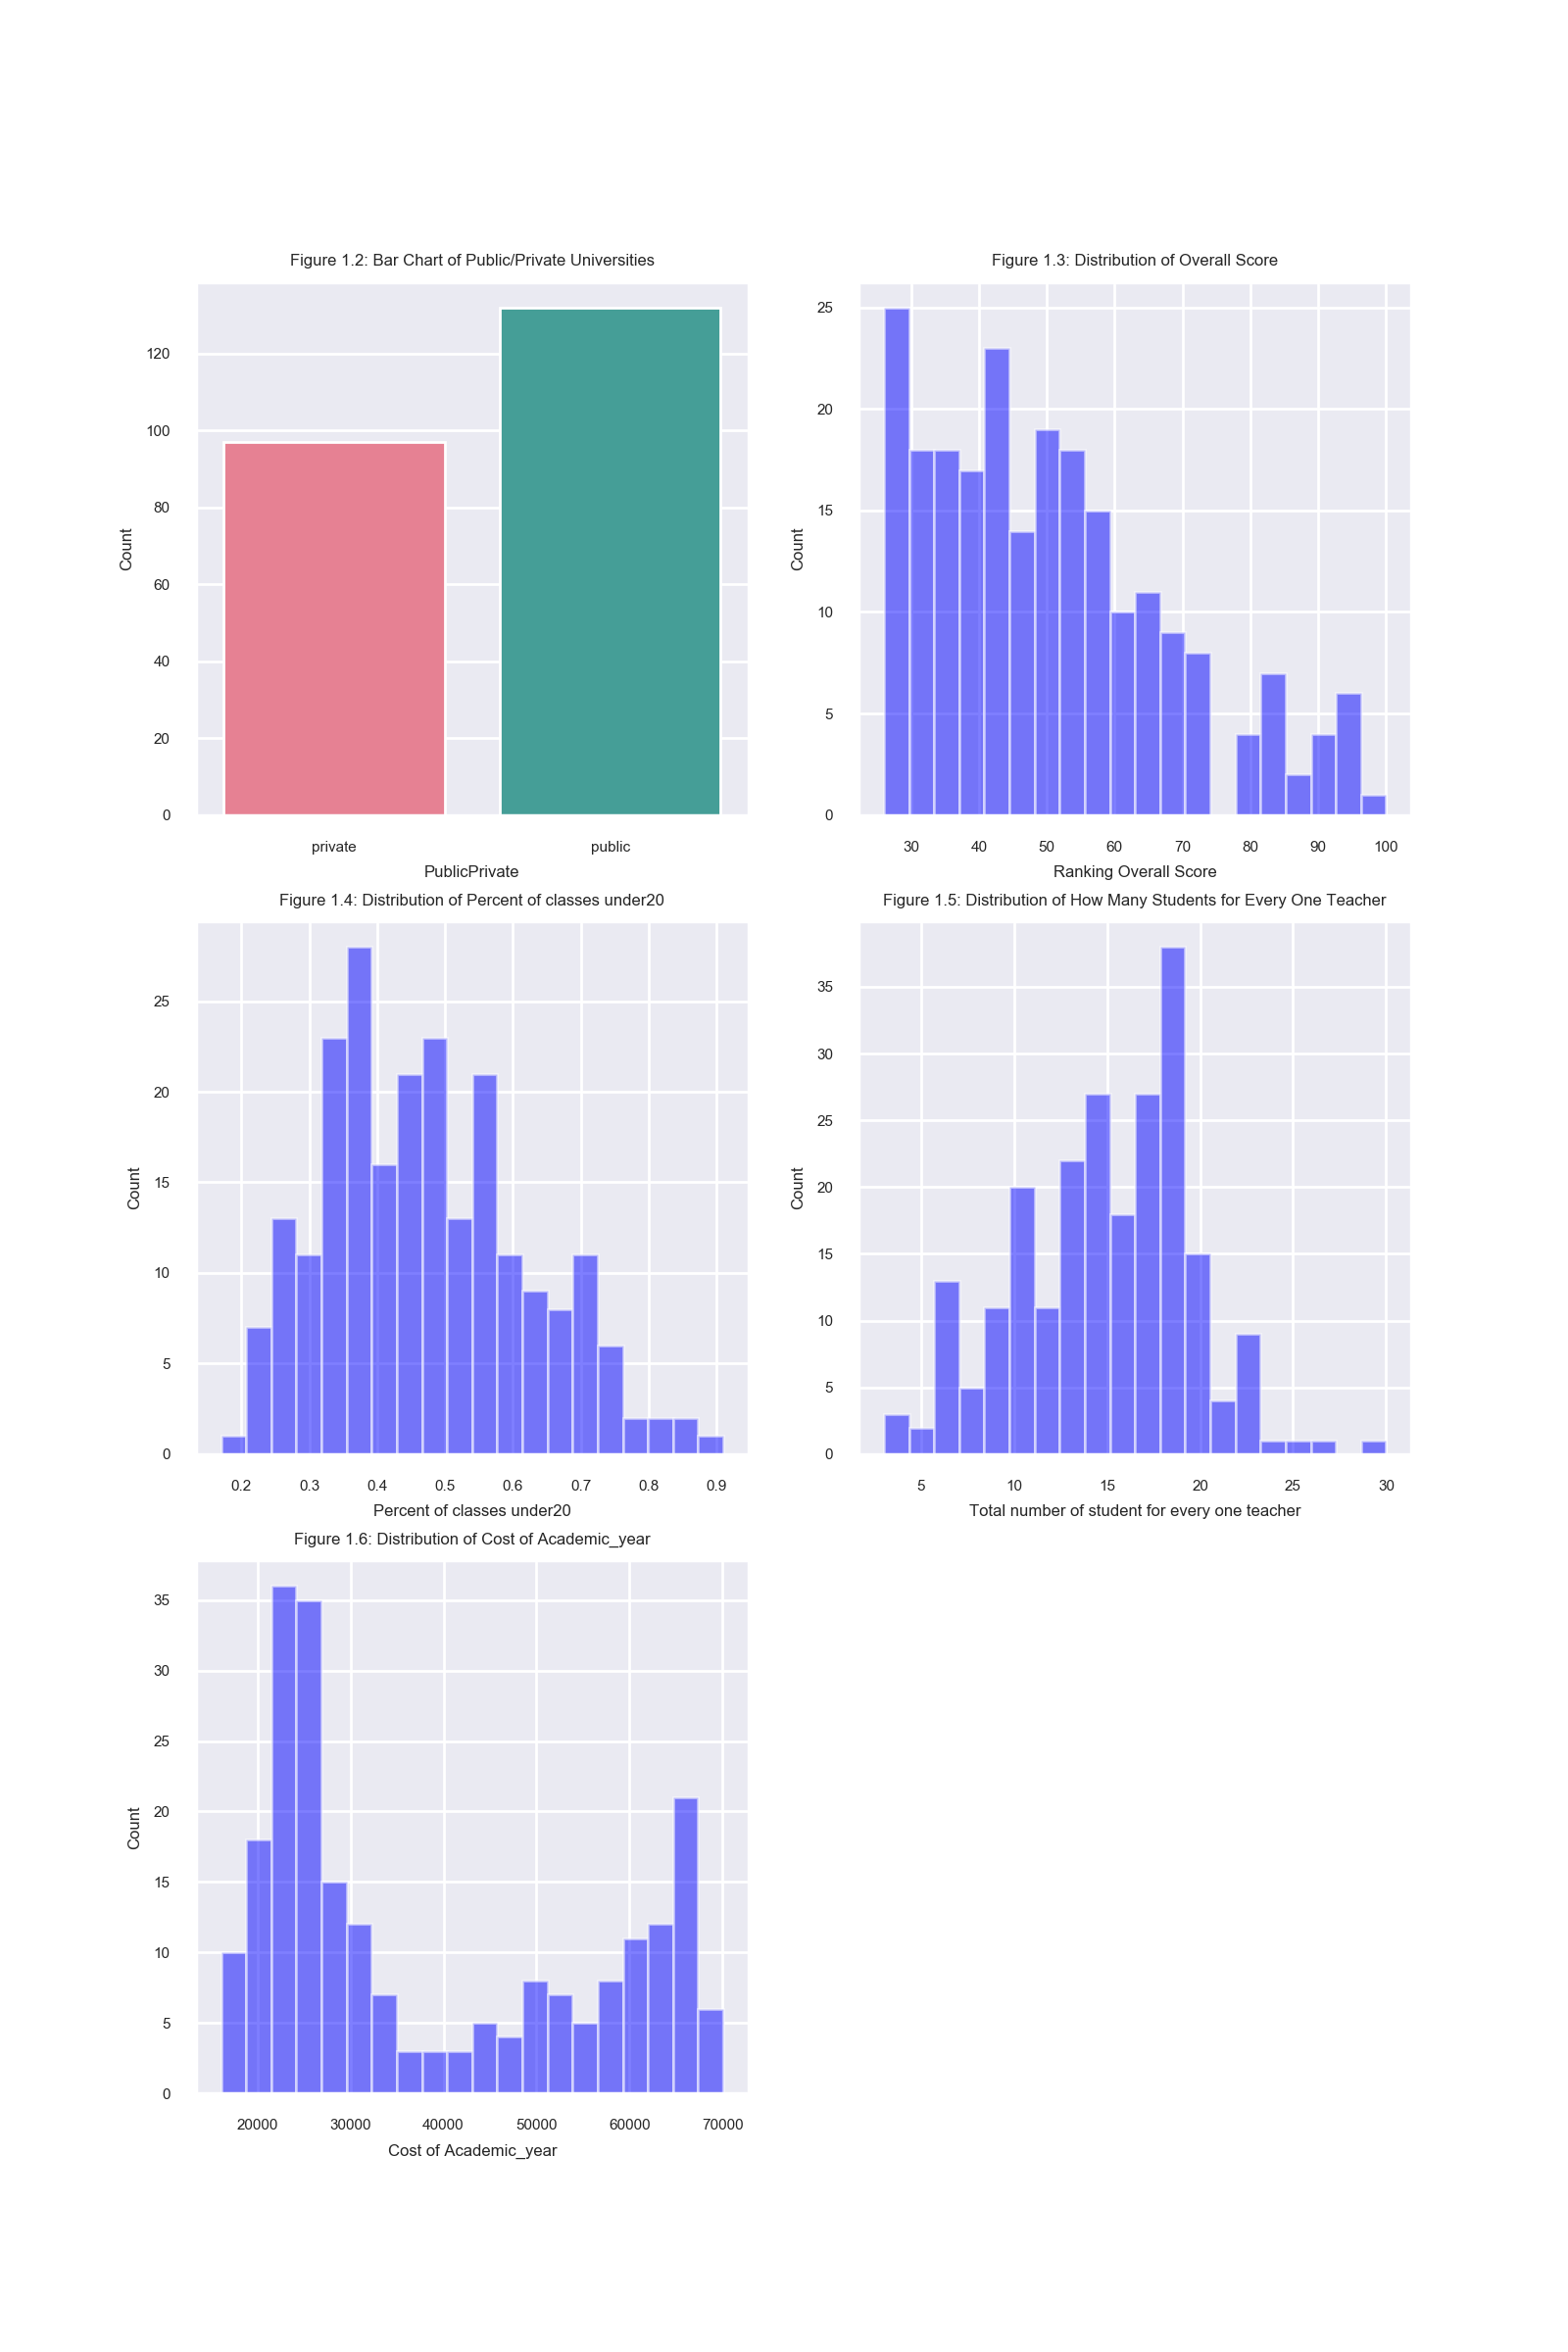

Text(0.5, 1.0, 'Figure 1.6: Distribution of Cost of Academic_year')

In [577]:
plt.figure(figsize=(8,12))

# Barplot for Public/Private
plt.subplot(321)
sns.countplot(x='PublicPrivate',data=df_new, palette='husl')
plt.title('Figure 1.2: Bar Chart of Public/Private Universities')
plt.ylabel('Count')


# Histogram for Ranking Overall Score
plt.subplot(322)
plt.hist(df_new['OverallScore'], bins = 20,facecolor='blue', alpha=0.5)
plt.xlabel('Ranking Overall Score')
plt.ylabel('Count')
plt.title('Figure 1.3: Distribution of Overall Score')

# Histogram for Percent of classes under20
plt.subplot(323)
plt.hist(df_new['Percentofclassesunder20'], bins = 20,facecolor='blue', alpha=0.5)
plt.xlabel('Percent of classes under20')
plt.ylabel('Count')
plt.title('Figure 1.4: Distribution of Percent of classes under20')

# Histogram for how many students for every one teacher.
plt.subplot(324)
plt.hist(df_new['Stu_Fac_Ratio'], bins = 20,facecolor='blue', alpha=0.5)
plt.xlabel('Total number of student for every one teacher')
plt.ylabel('Count')
plt.title('Figure 1.5: Distribution of How Many Students for Every One Teacher')


# Histogram for Cost of Academic_year.
plt.subplot(325)
plt.hist(df_new['Cost.Academic_year'], bins = 20,facecolor='blue', alpha=0.5)
plt.xlabel('Cost of Academic_year')
plt.ylabel('Count')
plt.title('Figure 1.6: Distribution of Cost of Academic_year')


#### 3.2d Description between private univerties and public universities


In [32]:
# make a copy
df_reshape = df_new.copy()
# drop unit ID
df_reshape = df_reshape.drop(['UNITID'], axis=1)

# group by PublicPrivate and Describe
a = pd.DataFrame(df_reshape.groupby('PublicPrivate').describe())
a

Cost.Academic_year                                       \
                           count          mean           std      min   
PublicPrivate                                                           
private                     97.0  56642.432990  10184.798591  17395.0   
public                     132.0  24741.030303   4296.679121  16078.0   

                                                   OverallScore             \
                    25%      50%      75%      max        count       mean   
PublicPrivate                                                                
private        50713.00  59833.0  65218.0  70100.0         97.0  57.948454   
public         22058.25  24279.0  27242.5  34998.0        132.0  45.106061   

                 ...    Stu_Fac_Ratio       enroll_rate                      \
                 ...              75%   max       count      mean       std   
PublicPrivate    ...                                                          
private          ...             13.0  21.0        97.0  0.303506  0.181585   
public           ...             19.0  30.0       132.0  0.310426  0.087501   

                                                                 
                    min       25%       50%       75%       max  
PublicPrivate                                                    
private        0.095549  0.166667  0.236007  0.365922  0.828179  
public         0.145550  0.249808  0.306994  0.368060  0.642686  

[2 rows x 40 columns]

In [33]:
# pivot the columns into the rows
a.stack()

Cost.Academic_year  OverallScore  \
PublicPrivate                                           
private       count           97.000000     97.000000   
              mean         56642.432990     57.948454   
              std          10184.798591     20.307722   
              min          17395.000000     27.000000   
              25%          50713.000000     41.000000   
              50%          59833.000000     54.000000   
              75%          65218.000000     72.000000   
              max          70100.000000    100.000000   
public        count          132.000000    132.000000   
              mean         24741.030303     45.106061   
              std           4296.679121     13.397196   
              min          16078.000000     26.000000   
              25%          22058.250000     33.750000   
              50%          24279.000000     43.500000   
              75%          27242.500000     54.000000   
              max          34998.000000     82.000000   

                     Percentofclassesunder20  Stu_Fac_Ratio  enroll_rate  
PublicPrivate                                                             
private       count                97.000000      97.000000    97.000000  
              mean                  0.589072      10.958763     0.303506  
              std                   0.124181       3.487829     0.181585  
              min                   0.320000       3.000000     0.095549  
              25%                   0.500000       9.000000     0.166667  
              50%                   0.590000      11.000000     0.236007  
              75%                   0.680000      13.000000     0.365922  
              max                   0.910000      21.000000     0.828179  
public        count               132.000000     132.000000   132.000000  
              mean                  0.385303      17.681818     0.310426  
              std                   0.095888       3.097199     0.087501  
              min                   0.170000       8.000000     0.145550  
              25%                   0.320000      16.000000     0.249808  
              50%                   0.380000      18.000000     0.306994  
              75%                   0.460000      19.000000     0.368060  
              max                   0.700000      30.000000     0.642686

There are 97 private universities and 132 public universities ranked on the U.S.News.

For private universities, the minimum cost is 17395, the highest cost is 70100, and the average cost is 56642. For public universitites, the minimum cost is 16078, the highest cost is 34998, and the average cost is 24741. 

The lowest overall score for private universities is 27 and the highest overall score is 100. For public universitites, the lowest overall score is 26 and the highest overall score is 82.

For private universities, the lowest enrollment rate is 9.6%, the highest enrollment rate is 82.8%, and the average rate is 30%. For public universitites, the lowest enrollment rate is 14.6%, the highest enrollment rate is 64.2%, and the average rate is 31%. 




#### 3.3  Research Question 1. What statistically significant association exists between independent variables and the enrollment rate?

Null hypothesis: There is no relationship between independent variables and the enrollment rate (and thus $\beta_1$ to $\beta_5$ equals zero)

Alternative hypothesis: There is relationship between independent variables and the enrollment rate (and thus $\beta_1$ to $\beta_5$ is not equal to zero).

Also, all data should be numerical. The feature of PublicPrivate is categorical variable and has two categories, I create a dummy variable that represents the categories as a binary value.



#### 3.3a Create a dummy variable

In [34]:
# create a new column called IsPrivate
df_new.rename(columns={'Cost.Academic_year':'Cost'}, inplace=True)

df_new_private=df_new.copy()

df_new_private = df_new.drop(['UNITID'], axis=1)

df_new_private['IsPrivate'] = df_new_private.PublicPrivate.map({'public':0, 'private':1})

df_new_private.head()


,school,PublicPrivate,OverallScore,State,Percentofclassesunder20,Stu_Fac_Ratio,Cost,enroll_rate,IsPrivate
0,Princeton University,private,100,NJ,0.76,5,61860.0,0.656281,1
1,Harvard University,private,96,MA,0.73,6,64400.0,0.828179,1
2,Columbia University,private,94,NY,0.82,6,69021.0,0.614133,1
3,Massachusetts Institute of Technology,private,94,MA,0.70,3,63250.0,0.755510,1
4,University of Chicago,private,94,IL,0.80,5,70100.0,0.717652,1


#### 3.3b Correlations between the variables

<IPython.core.display.Javascript object>


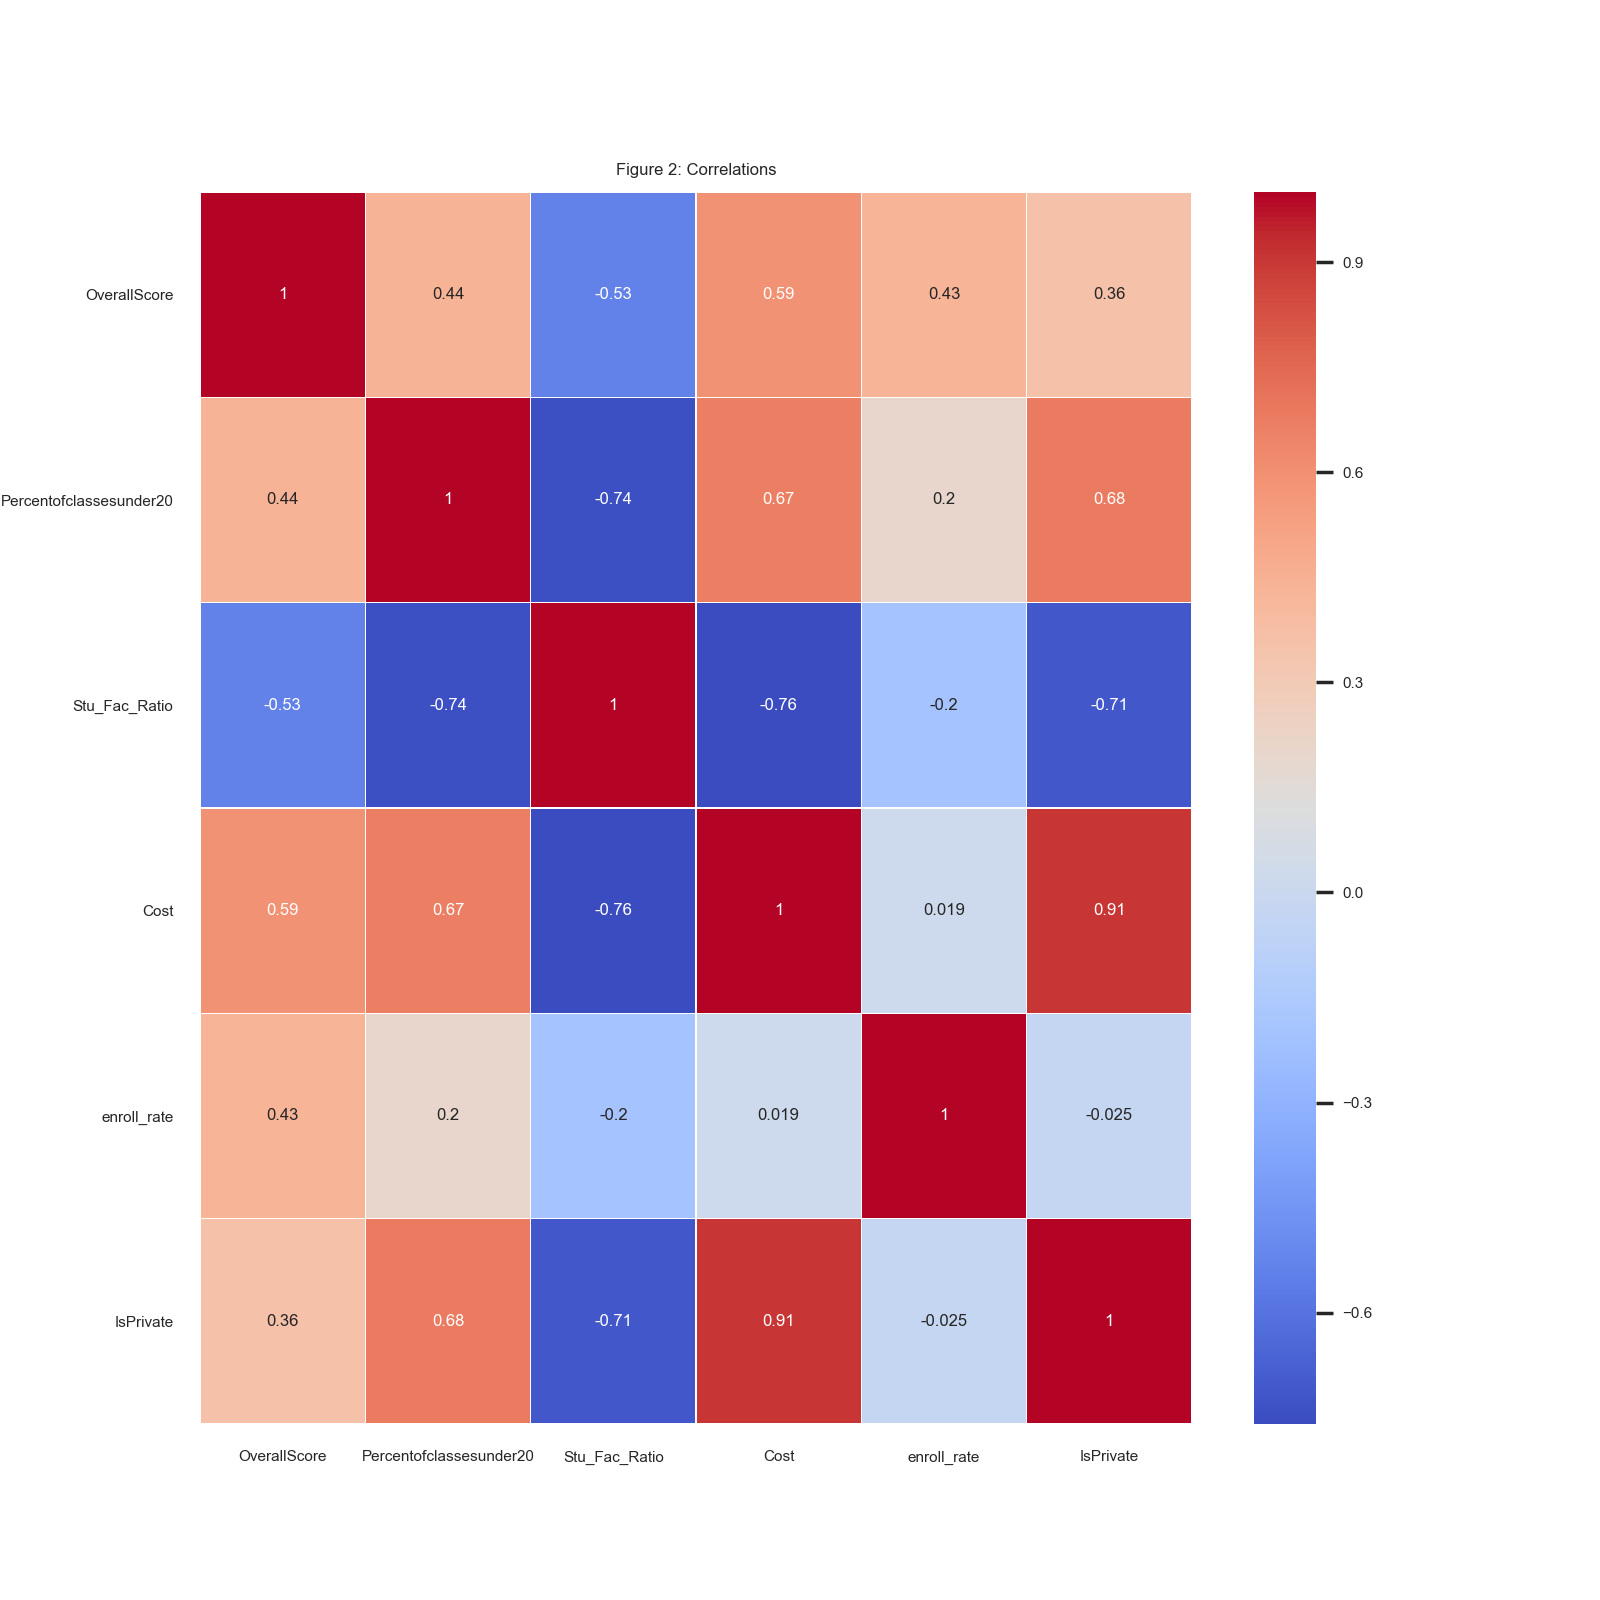

Text(0.5, 1.0, 'Figure 2: Correlations')

In [599]:
# Find correlations 
plt.figure(figsize=(8,8))
sns.heatmap(df_new_private.corr(),linewidths=.1,cmap='coolwarm', annot=True)
plt.yticks(rotation=0)
plt.title('Figure 2: Correlations')


In [600]:
pd.DataFrame(df_new_private.corr())

,OverallScore,Percentofclassesunder20,Stu_Fac_Ratio,Cost,enroll_rate,IsPrivate
OverallScore,1.000000,0.436778,-0.533084,0.593480,0.431652,0.357073
Percentofclassesunder20,0.436778,1.000000,-0.739271,0.665926,0.200999,0.680967
Stu_Fac_Ratio,-0.533084,-0.739271,1.000000,-0.758778,-0.199205,-0.714406
Cost,0.593480,0.665926,-0.758778,1.000000,0.019327,0.906285
enroll_rate,0.431652,0.200999,-0.199205,0.019327,1.000000,-0.025336
IsPrivate,0.357073,0.680967,-0.714406,0.906285,-0.025336,1.000000


In [601]:
# double check correlation coefficient
pd.DataFrame(df_new_private.corr()['enroll_rate'])

,enroll_rate
OverallScore,0.431652
Percentofclassesunder20,0.200999
Stu_Fac_Ratio,-0.199205
Cost,0.019327
enroll_rate,1.000000
IsPrivate,-0.025336


#### 3.3c Plots for relationship between independent variable and dependent variable

<IPython.core.display.Javascript object>


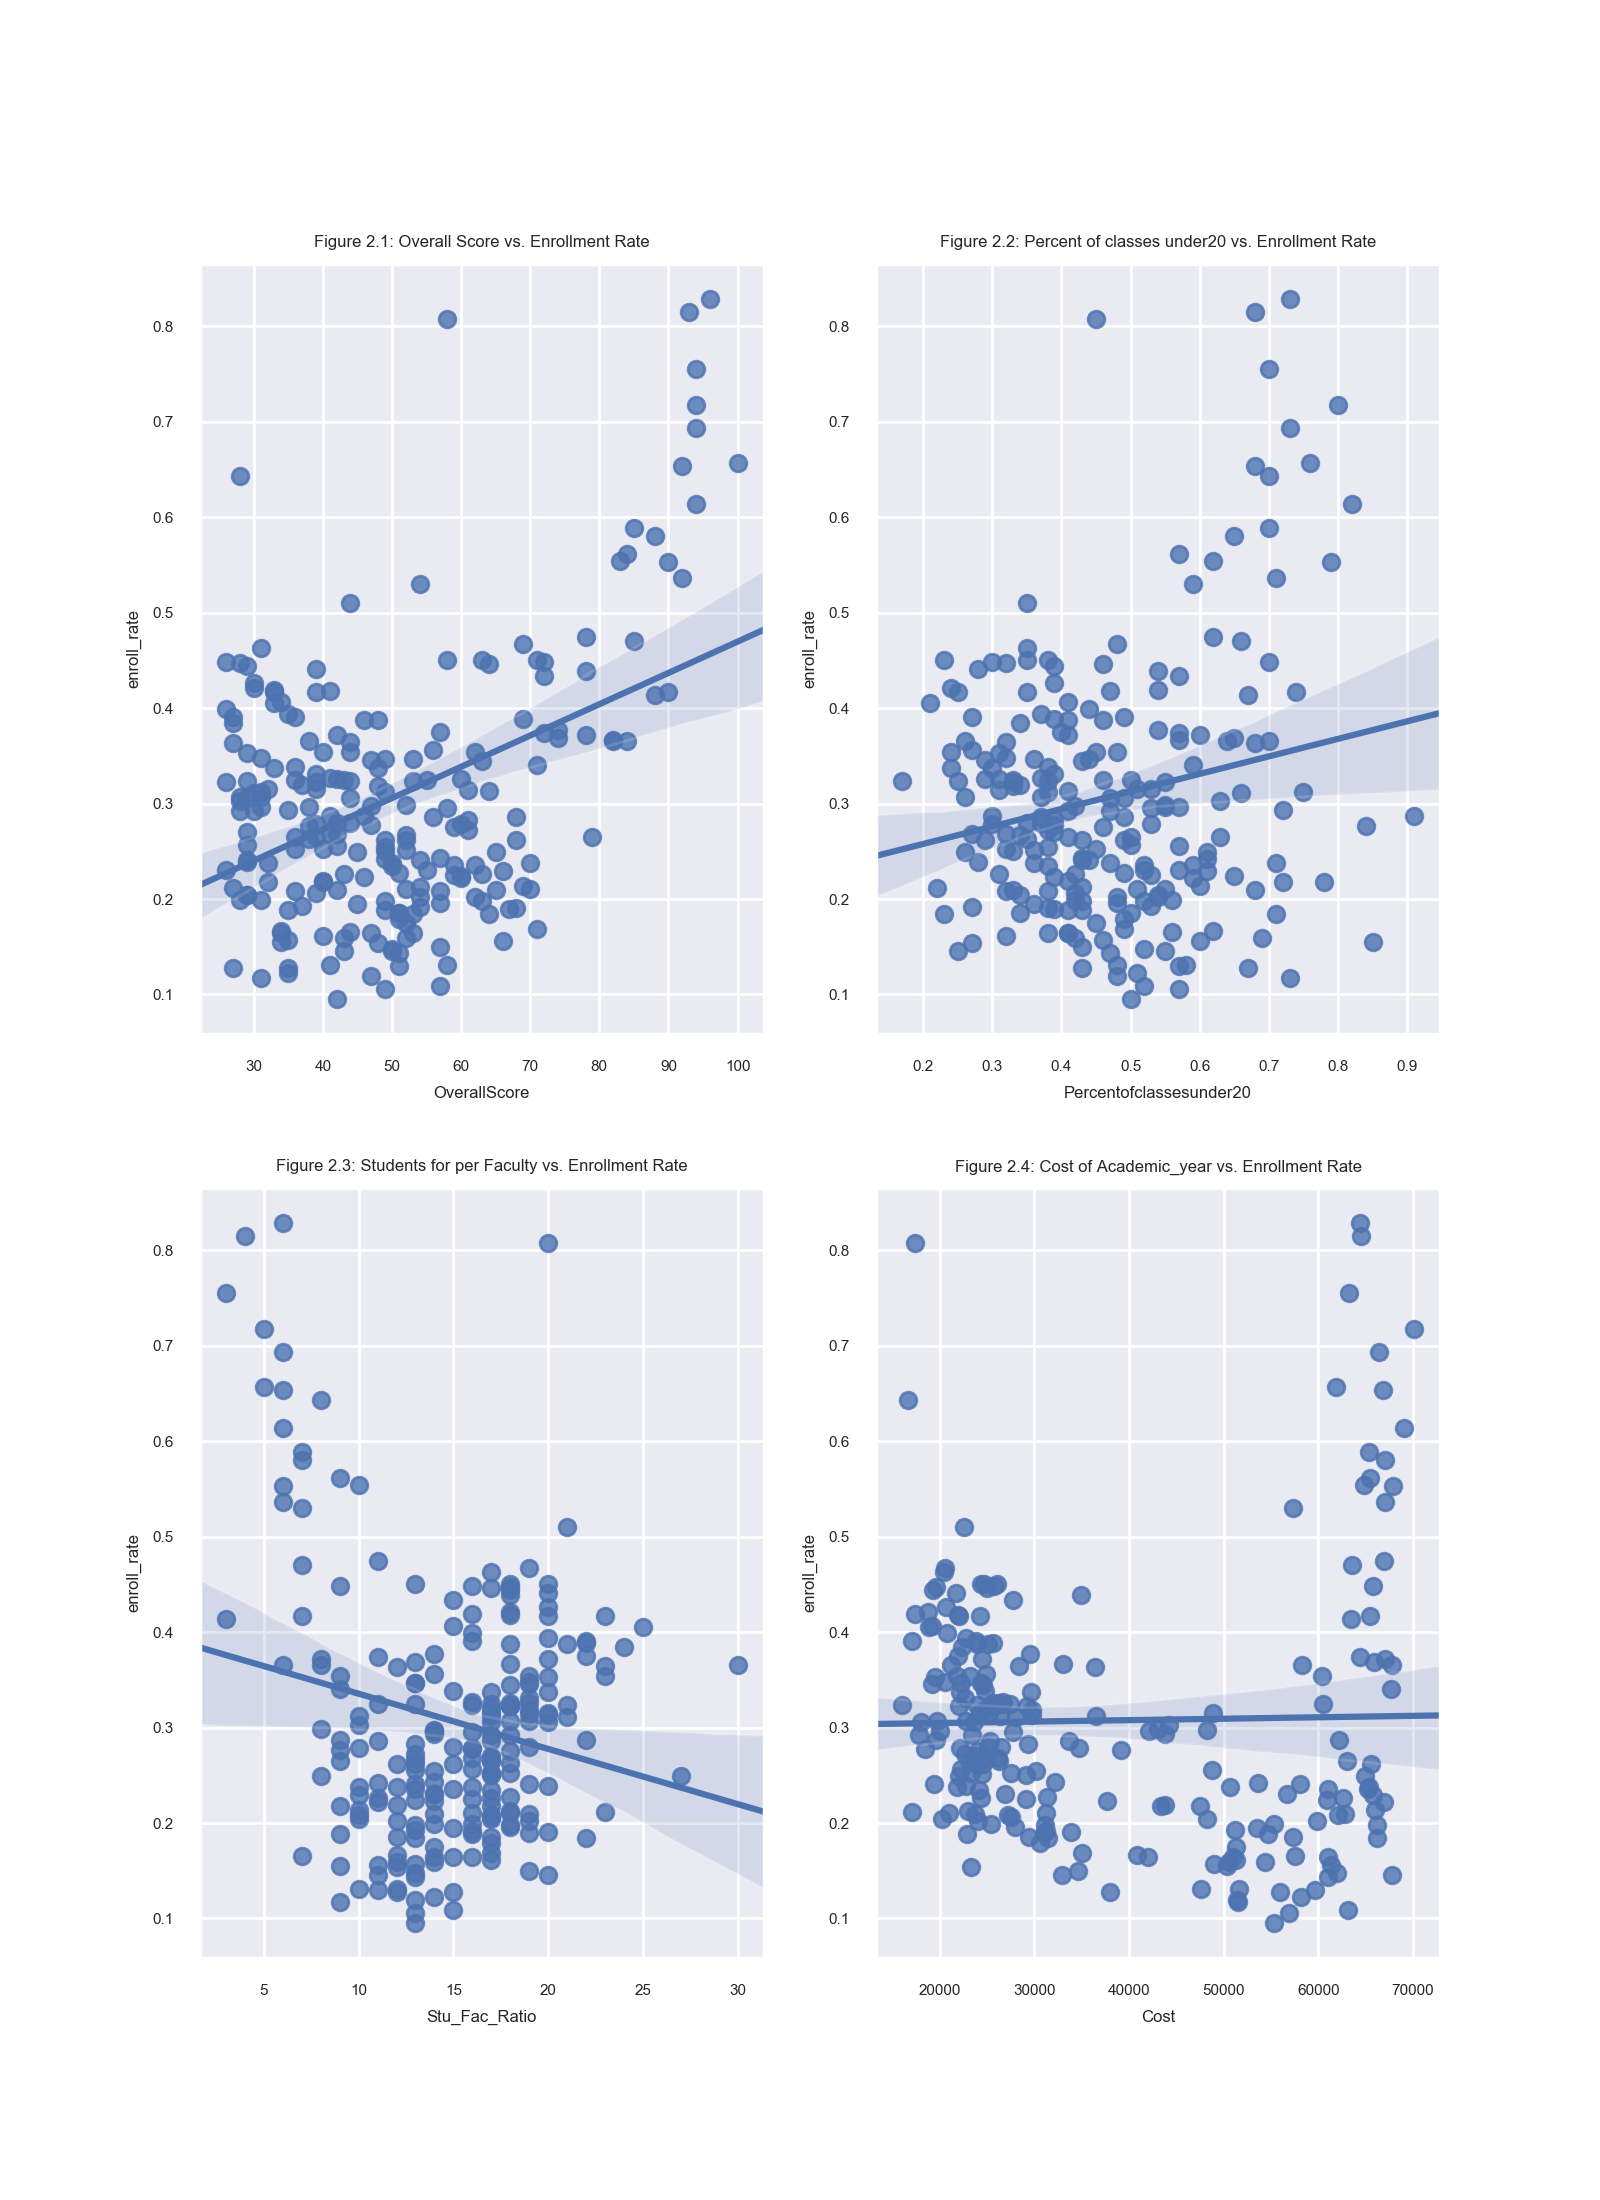

Text(0.5, 1.0, 'Figure 2.4: Cost of Academic_year vs. Enrollment Rate')

In [605]:
plt.figure(figsize=(8,11))

# Plot a relationship between two variables
plt.subplot(221)
sns.regplot(x="OverallScore", y="enroll_rate",data=df_new)
plt.title('Figure 2.1: Overall Score vs. Enrollment Rate')

plt.subplot(222)
sns.regplot(x="Percentofclassesunder20", y="enroll_rate",data=df_new)
plt.title('Figure 2.2: Percent of classes under20 vs. Enrollment Rate')

plt.subplot(223)
sns.regplot(x="Stu_Fac_Ratio", y="enroll_rate",data=df_new)
plt.title('Figure 2.3: Students for per Faculty vs. Enrollment Rate')

plt.subplot(224)
sns.regplot(x="Cost", y="enroll_rate",data=df_new)
plt.title('Figure 2.4: Cost of Academic_year vs. Enrollment Rate')


OverallScore, Percentofclassesunder20, and Cost are positively correlated with enroll_rate.
Stu_Fac_Ratio and IsPrivate are negatively correlated with enroll_rate.

From the Figure 2 above, the variable of 'IsPrivate' and 'Cost.Academic_year' are strongly correlated, r=0.91. Multicollinearity is a problem in regression analysis that occurs when two independent variables are highly correlated (r = 0.90, or higher). That is, the model should have little or no multicollinearity. Therefore, we need to delete either 'IsPrivate' or 'Cost.Academic_year' for the further regression analysis. 

From the Figure 2.5 above, we found that enroll_rate would keep unchanged as the Cost.Academic_year increased, but I would like to see the impact of cost on the enrollment rate. Therefore, I decided to delete IsPrivate from the dataset.



In [606]:
# Create a subset for regression.
df_regression = df_new_private.copy()

# delete variable of IsPrivate, and delete 'State','PublicPrivate' that are not used
# for regression.
df_regression = df_regression.drop(['State','PublicPrivate','IsPrivate'], axis=1)


<IPython.core.display.Javascript object>


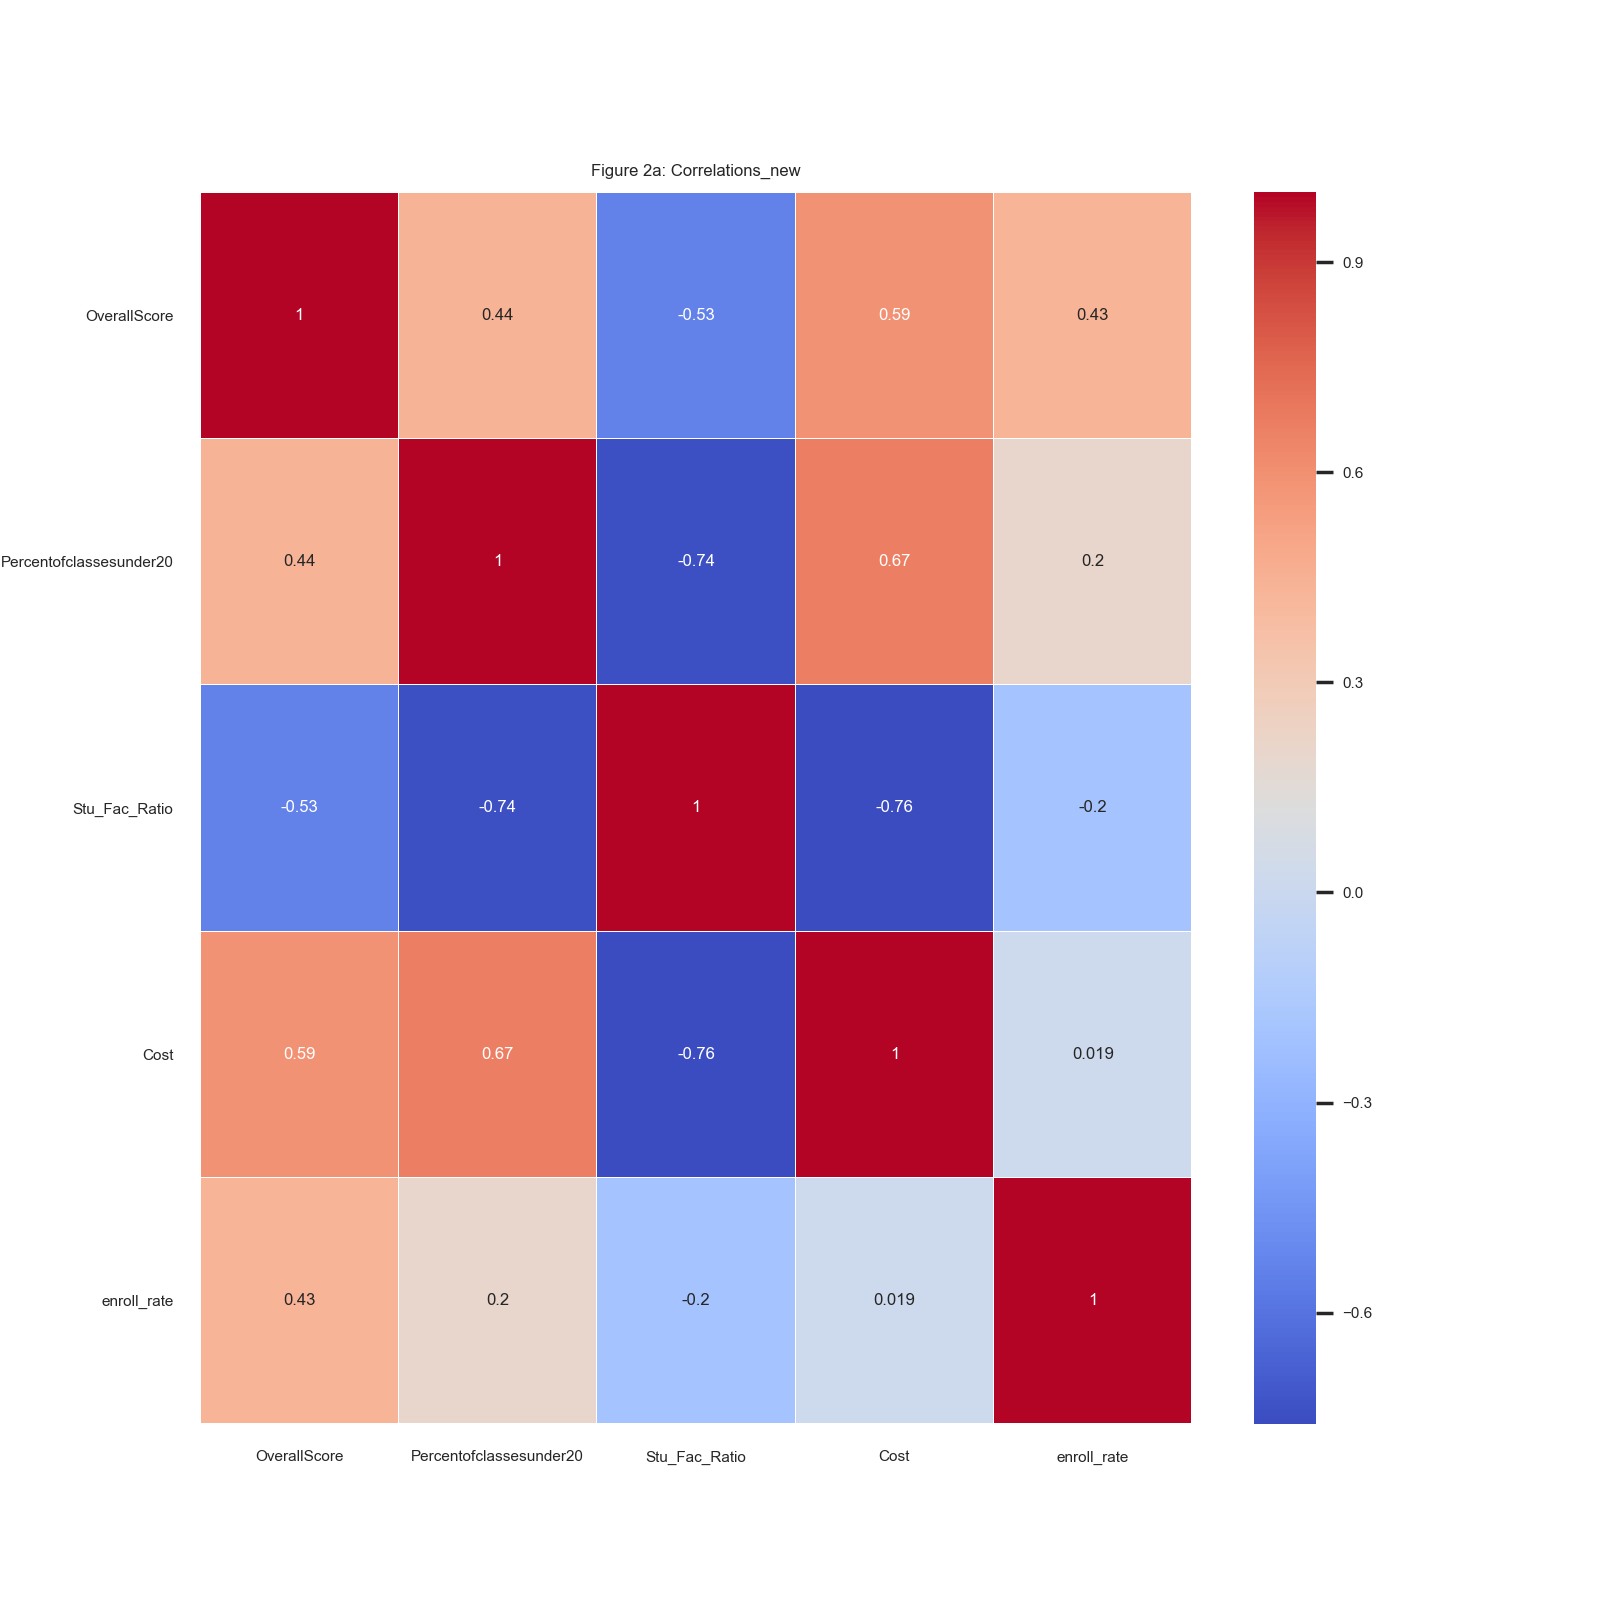

Text(0.5, 1.0, 'Figure 2a: Correlations_new')

In [607]:
# double check correlation coefficient
plt.figure(figsize=(8,8))
sns.heatmap(df_regression.corr(),linewidths=.1,cmap='coolwarm', annot=True)
plt.yticks(rotation=0)
plt.title('Figure 2a: Correlations_new')

The correlations look good!


#### 3.3d Multiple Linear Regression

There is more than one feature for this study, so we conducted multiple linear regression to predict the dependent variable:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. $\beta_0$, $\beta_1$...$\beta_n$ are called the model coefficients. 

In this case:

$y = \beta_0 + \beta_1 \times OverallScore + \beta_2 \times Percentofclassesunder20 + \beta_3 \times StudentFacultyRatio + \beta_4 \times Cost$



#### 3.3e. Build Model with all 4 Predictors by using Statsmodels and SCIKIT-LEARN


Use patsy.dmatrices() to generate the design matrix for a linear model. The resulting "dmatrix" is then fed into a pre-built statistical modeling function from statsmodels.


In [667]:
# Use patsy.dmatrices() to generate the design matrix for a linear model. 
y, X = dmatrices('enroll_rate ~ OverallScore + Percentofclassesunder20 + \
                      Stu_Fac_Ratio  + Cost',
                  df_regression, return_type="dataframe")


#### 1) Use Statsmodels 

In [668]:
### STATSMODELS ###

# create a fitted model
model01 = sm.OLS(y, X).fit()

# print the coefficients
model01.params


Intercept                  0.258869
OverallScore               0.004629
Percentofclassesunder20    0.189685
Stu_Fac_Ratio             -0.005847
Cost                      -0.000005
dtype: float64

In [669]:
# displays a comprehensive table with statistical info generated by statsmodels
print(model01.summary())

                            OLS Regression Results                            
Dep. Variable:            enroll_rate   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     27.93
Date:                Sun, 05 May 2019   Prob (F-statistic):           7.97e-19
Time:                        07:48:05   Log-Likelihood:                 180.03
No. Observations:                 229   AIC:                            -350.1
Df Residuals:                     224   BIC:                            -332.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### 2) Use SCIKIT-LEARN

In [670]:
### SCIKIT-LEARN ###

# instantiate and fit
model02 = LinearRegression()
model02.fit(X, y)

# print the coefficients
print(model02.intercept_)
print(model02.coef_)

[0.25886914]
[[ 0.00000000e+00  4.62921392e-03  1.89685095e-01 -5.84655285e-03
  -4.91694803e-06]]


#### 3.3f Interpreting Model Coefficients

Interprete the OverallScore coefficient ( β1 ), 

the Percentofclassesunder20 coefficient ( β2 ),

the Stu_Fac_Ratio coefficient ( β3 ), and the Cost coefficient ( β4 ).


A "unit" increase in OverallScore is associated with a 0.004629 "unit" increase in enrollment rate.

A "unit" increase in Percentofclassesunder20 is associated with a 0.189685 "unit" increase in enrollment rate. 

A "unit" increase in Stu_Fac_Ratio is associated with a 0.005847 "unit" decrease in enrollment rate.

A "unit" increase in Cost is associated with a 0.000005 "unit" decrease in enrollment rate. 

Increases in OverallScore and Percentofclassesunder20 correspond to an increase of enrollment rate. For both the Stu_Fac_Ratio and the Cost, the highest likelihood of having a highest enrollment rate corresponds to the lowest of Stu_Fac_Ratio and Cost, since both coefficients are negative.


#### Results:

##### Research Question 1. What statistically significant association exists between independent variables and the enrollment rate?

All four independent variables - OverallScore, Percentofclassesunder20, Stu_Fac_Ratio and Cost have significant p-values (p<.05). Thus we reject the null hypothesis that there is no association between independent variables and the enrollment rate.


OverallScore and Percentofclassesunder20 are positively associated with the enrollment rate, whereas Stu_Fac_Ratio and Cost are slightly negatively associated with the enrollment rate. 




####  3.4 Research Questions 2: To what extent does independent variables predict the enrollment rate?

We just conducted a multiple linear regression that contains all four independent variables. This regression model has a R Square of 0.333. The R Square value indicates how much of the total variation in the dependent variable, enrollment rate, can be explained by the independent variables. In this case, 33.3% can be explained, which is not large.

Next, we perform feature selection to check whether the R Square value goes up when we use individual predictor. This is a simple linear regression.


#### 3.4a Model contains only one predictor - lm02, lm03, lm04, lm05

In [611]:
# only include OverallScore in the model
lm02 = smf.ols(formula='enroll_rate ~ OverallScore', data=df_regression).fit()
lm02.rsquared

0.18632340691792837

In [612]:
# only include Percentofclassesunder20 in the model
lm03 = smf.ols(formula='enroll_rate ~ Percentofclassesunder20', data=df_regression).fit()
lm03.rsquared

0.04040056719767249

In [613]:
# only include Stu_Fac_Ratio in the model
lm04 = smf.ols(formula='enroll_rate ~ Stu_Fac_Ratio', data=df_regression).fit()
lm04.rsquared

0.03968245691169858

In [614]:
# only include Cost in the model
lm05 = smf.ols(formula='enroll_rate ~ Cost', data=df_regression).fit()
lm05.rsquared

0.00037354938747391486

Results:

Compared with models that contain only one independent variable, the model containing all four features has a higher R square (0.333), which means that this model provides a better fit to the data than the model that includes only one independent variable.

#### 3.4b Build  three Predictors Model - lm07

Then, we try a different model that remove Cost from the first modle because the Cost coefficient ( β4 =0.000005) is very low.


In [694]:
# Use patsy.dmatrices() to generate the design matrix for a linear model.
y02, X02 = dmatrices('enroll_rate ~ OverallScore + Percentofclassesunder20 + \
                      Stu_Fac_Ratio',
                  df_regression, return_type="dataframe")

# create a fitted model with all five features
lm7 = sm.OLS(y02, X02).fit()

In [695]:
# check the regression coefficients for our 3 explanatory variables (X1, X2, X3)
lm7.params

Intercept                  0.060172
OverallScore               0.003418
Percentofclassesunder20    0.069480
Stu_Fac_Ratio              0.002816
dtype: float64

In [696]:
# displays a comprehensive table with statistical info generated by statsmodels
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:            enroll_rate   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     17.62
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.60e-10
Time:                        10:59:43   Log-Likelihood:                 157.86
No. Observations:                 229   AIC:                            -307.7
Df Residuals:                     225   BIC:                            -294.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### Results:

We use Adjusted$R^2$ to compares the explanatory power of regression models that contain different numbers of predictors.

The two predictors model-lm07 has a Adjusted $R^2$ of 0.179. 

The first model contains 4 independent variables, and the Adjusted $R^2$ is 0.333. The model lm07 removed 1 independent variable that have least coefficient from the first model, and the Adjusted $R^2$ is 0.179. Therefore, the Adjusted $R^2$ for the first model is better than that for lm07.Therefore, the four predictors model - model01/model02 is the best model.


##### Research Question 2. To what extent does independent variables predict the enrollment rate?

A multiple linear regression was run to predict enrollment rate from OverallScore, Percentofclassesunder20, Stu_Fac_Ratio and Cost. These variables statistically significantly predicted enrollment rate, p < .05, R2 = .333. All four variables explain 33.3% of the variability of the dependent variable - enrollment rate.



#### 3.4c Model Evaluation Using Train/Test Split

Evaluate the model by splitting into train and test sets

Now we use the train_test_split function in order to make the split. The test_size=0.4 inside the function indicates the percentage of the data that should be held over for testing. It’s 60/40, 40% of the data for testing. We fit the model on the training data.


In [715]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate model
model03 = LinearRegression()

# Fit model
model03.fit(X_train, y_train)

# Predict
predictions = model03.predict(X_test)

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [738]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# MSE
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


(137, 5)
(137, 1)
(92, 5)
(92, 1)
MSE: 0.011674259487239625
RMSE: 0.10804748718614249


<IPython.core.display.Javascript object>


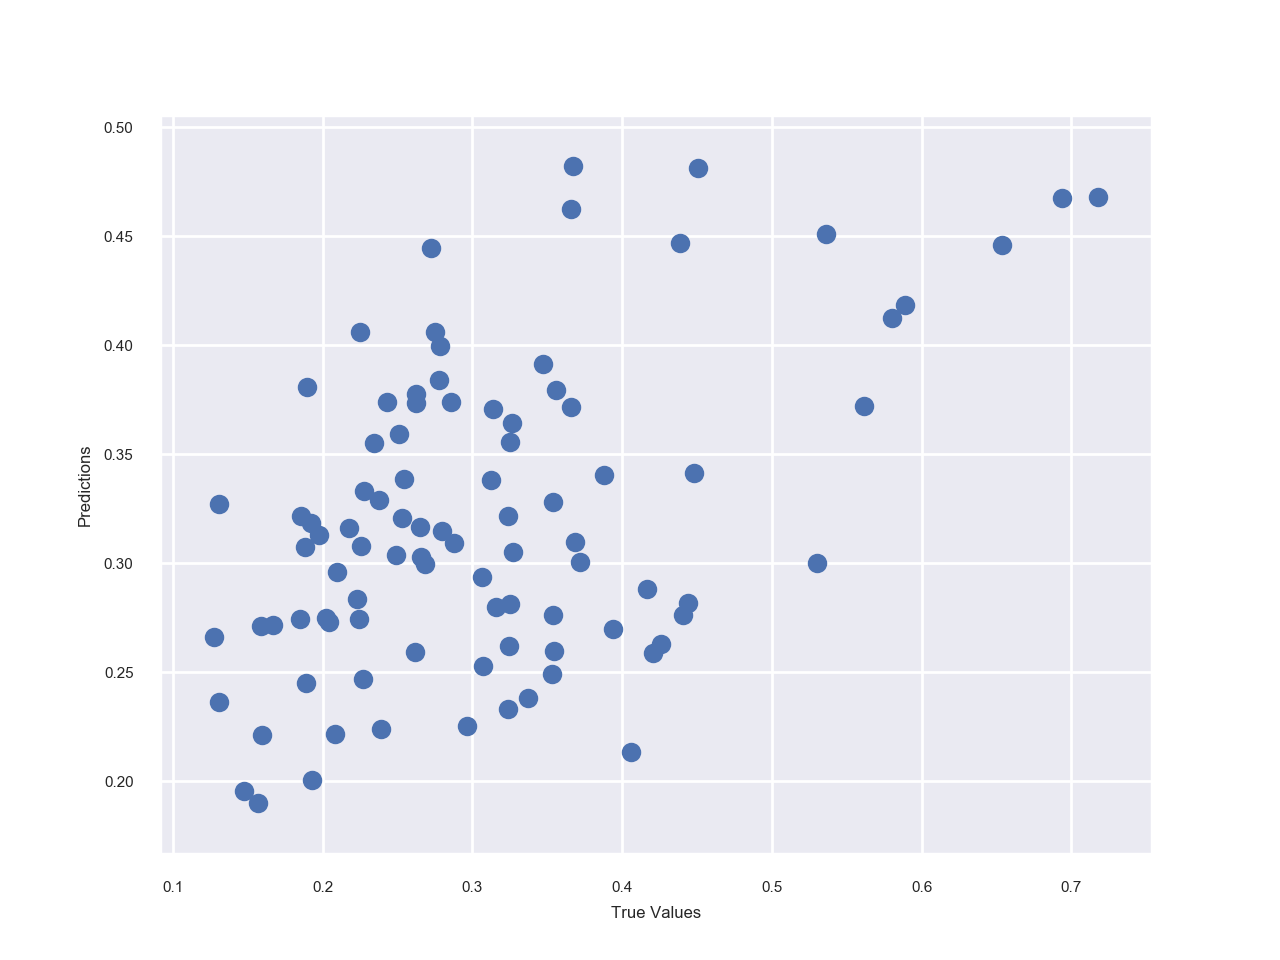

Text(0, 0.5, 'Predictions')

In [703]:
#visualise the prediction
plt.scatter(y_test,predictions)

plt.xlabel('True Values')
plt.ylabel('Predictions')


#### 3.4d Using the Model for Prediction

#####  1) Manual Prediction

In [727]:
# print the coefficients
model01.params

Intercept                  0.258869
OverallScore               0.004629
Percentofclassesunder20    0.189685
Stu_Fac_Ratio             -0.005847
Cost                      -0.000005
dtype: float64

In [ ]:
# manually calculate the prediction

0.258869 + 0.004629*OverallScore + 0.189685*Percentofclassesunder20
- 0.005847 *Stu_Fac_Ratio - 0.000005* Cost


##### 2) Statsmodels Prediction

In [ ]:
### STATSMODELS ###

# Create a DataFrame since the Statsmodels formula interface requires it
X_new = pd.DataFrame({'OverallScore': [ ],
                     'Percentofclassesunder20': [ ],
                     'Stu_Fac_Ratio': [ ],
                     'Cost':[ ]})

# predict for a new observation
model01.predict(X_new)


##### 3) Scikit-learn Prediction

In [ ]:
### SCIKIT-LEARN ###
a = the number of OverallScore
b = the number of Percentofclassesunder20
c = the number of Stu_Fac_Ratio
d = the number of Cost

# define one new instance
Xnew = [[a, b, c, d]]

# predict for a new observation
model02.predict(X_new)


#### 3.5 Conclusion

In [742]:
# Rank universities by enrollment rate by descending order
# Pick the top 10

df_new.sort_values(by ='enroll_rate',ascending=False).head(10)

,school,UNITID,PublicPrivate,OverallScore,State,Percentofclassesunder20,Stu_Fac_Ratio,Cost,enroll_rate
1,Harvard University,166027,private,96,MA,0.73,6,64400.0,0.828179
6,Stanford University,243744,private,93,CA,0.68,4,64477.0,0.815348
65,Brigham Young Univ.--Provo,230038,private,58,UT,0.45,20,17395.0,0.807361
3,Massachusetts Institute of Technology,166683,private,94,MA,0.70,3,63250.0,0.755510
4,University of Chicago,144050,private,94,IL,0.80,5,70100.0,0.717652
5,Yale University,130794,private,94,CT,0.73,6,66445.0,0.693456
0,Princeton University,186131,private,100,NJ,0.76,5,61860.0,0.656281
8,University of Pennsylvania,215062,private,92,PA,0.68,6,66800.0,0.653713
219,University of Alaska--Fairbanks,102614,public,28,AK,0.70,8,16694.0,0.642686
2,Columbia University,190150,private,94,NY,0.82,6,69021.0,0.614133


In [743]:
# Rank universities by enrollment rate by descending order
# Pick the lowest 10

df_new.sort_values(by ='enroll_rate',ascending=False).tail(10)

,school,UNITID,PublicPrivate,OverallScore,State,Percentofclassesunder20,Stu_Fac_Ratio,Cost,enroll_rate
146,Adelphi University,188429,private,41,NY,0.48,12,47647.0,0.130510
98,University of Denver,127060,private,51,CO,0.57,11,59656.0,0.130171
176,Florida Institute of Technology,133881,private,35,FL,0.43,15,55984.0,0.127678
220,Benedictine University,145619,private,27,IL,0.67,12,38036.0,0.127486
179,Pace University,194310,private,35,NY,0.51,14,58188.0,0.122734
121,Seton Hall University,186584,private,47,NJ,0.48,13,51395.0,0.119277
198,University of Hartford,129525,private,31,CT,0.73,9,51495.0,0.117430
70,Fordham University,191241,private,57,NY,0.52,15,63109.0,0.108891
112,University of the Pacific,120883,private,49,CA,0.57,13,56899.0,0.106077
140,Hofstra University,191649,private,42,NY,0.50,13,55322.0,0.095549


In [744]:
# Rank universities by Cost by descending order
# Pick the lowest 5

df_new.sort_values(by ='Cost',ascending=False).tail(5)

,school,UNITID,PublicPrivate,OverallScore,State,Percentofclassesunder20,Stu_Fac_Ratio,Cost,enroll_rate
65,Brigham Young Univ.--Provo,230038,private,58,UT,0.45,20,17395.0,0.807361
223,New Mexico State University,188030,public,27,NM,0.49,16,17053.0,0.390440
221,California State University--Fullerton,110565,public,27,CA,0.22,23,17049.0,0.211861
219,University of Alaska--Fairbanks,102614,public,28,AK,0.70,8,16694.0,0.642686
205,California State University--Fresno,110556,public,29,CA,0.17,21,16078.0,0.323690


The tables above shows universities with the top 10 enrollment rates and the lowest 20 enrollment rates. Universities ranked on the top of U.S.News ranking are more likely to have the highest enrollment rate. This finding is consistent with Keling (2007)’s finding that the most influential factor that students will evaluate in selecting their choice of institution was reputation of the institution. In addition, the 10 universities with the lowest enrollment rates are not related to their rankings on the U.S.News. For example, Fordham University ranked 70 on U.S.New, but only has a 10.9% enrollment rate. Also, 6 institutions having the lowest enrollment rates are from the tri-state area of New York, New Jersey, and Connecticut. 

Furthermore, for Brigham Young Univ.--Provo and University of Alaska--Fairbanks, the ranking did not weaken their enrollment rates. This may be caused by their lower tuitions when compared with other universities, public or private.

There are a total of 97 private universities and 132 public universities ranked on the U.S.News. For the universities with highest enrollment rates, there are 9 private and only 1 public. Therefore, private universities are much more competitive to get admitted. 


For the universities with highest enrollment rates, most of the classes in these universities are small sizes with under 20 students, and have smaller student to faculty ratios. Although the final regression model only contribute 33.3% of the variability of the enrollment rate, all four factors used for this study are indispensable that influence the decisions of students to choose universities to study at.


-----------------

### IV.  Student First-Year Retention Rate
-By Wen Chen

#### 4.1: Introduction

First-year retention rate examines how many students start their freshman year and then returns their sophomore year. A high retention rate shows that first-year students are happy with the school and wish to continue there. They also show that schools are providing the necessary services to keep students happy and prosperous while at school. While there is no single way to define student success, the most common measure in academic research is retention. Since first-year retention rate is such an important indicator to schools and students, which factors can affect it is a necessary question we need to answer. 

#### Statement of the Problem: This exploratory data analysis seeks to answer the following questions:
1. Whose retention performance is better, private or public?<br>
2. Do the financial resources of schools positively affect retention rate? And does academic year student cost affects retention rate negatively?<br>
3. Draw a retention rate linear regression model as a prediction method, based on variables such as school overall score, SAT, ACT, peer assessment score from other colleges, student-faculty ratio, and student cost in an academic year.<br>

Reference:<br>
(1) https://www.unigo.com/admissions-advice/what-are-freshman-retention-rates-and-why-do-they-matter/180/1

(2) https://www.algonquincollege.com/academic-success/files/2014/12/Predicting-College-Student-Retention-Literature-Review-1.pdf


#### 4.2: Exploratory Data Analysis



In [72]:
# Create a subset for the research of Enrollment Rate
# create a new dataset to store data I want to use
# use the 'copy()' function if you want to preserve the original data frame
df_retention = df01.loc[:, ['rank', 'school', 'Averagefirstyearretentionrate', 'PublicPrivate', 'State', 'OverallScore',
                          'PeerAssessmentScore', 'Stu_Fac_Ratio', 'Financialresourcesrank', 
                          'Admissions.ACT.midpoint.cumulative', 'Admissions.SAT.avg', 'Cost.Academic_year']].copy()

# change retention column's name
df_retention=df_retention.rename(columns = {'Averagefirstyearretentionrate':'RetentionRate'})

# check the null condition
df_retention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 12 columns):
rank                                  229 non-null int64
school                                229 non-null object
RetentionRate                         229 non-null float64
PublicPrivate                         229 non-null object
State                                 229 non-null object
OverallScore                          229 non-null int64
PeerAssessmentScore                   229 non-null float64
Stu_Fac_Ratio                         229 non-null int8
Financialresourcesrank                229 non-null int64
Admissions.ACT.midpoint.cumulative    229 non-null float64
Admissions.SAT.avg                    229 non-null float64
Cost.Academic_year                    229 non-null float64
dtypes: float64(5), int64(3), int8(1), object(3)
memory usage: 21.7+ KB


In [73]:
df_retention.head()

,rank,school,RetentionRate,PublicPrivate,State,OverallScore,PeerAssessmentScore,Stu_Fac_Ratio,Financialresourcesrank,Admissions.ACT.midpoint.cumulative,Admissions.SAT.avg,Cost.Academic_year
0,1,Princeton University,0.98,private,NJ,100,4.9,5,10,34.0,1493.0,61860.0
1,2,Harvard University,0.97,private,MA,96,4.9,6,7,34.0,1506.0,64400.0
2,3,Columbia University,0.99,private,NY,94,4.7,6,13,34.0,1496.0,69021.0
3,3,Massachusetts Institute of Technology,0.99,private,MA,94,4.9,3,1,34.0,1519.0,63250.0
4,3,University of Chicago,0.99,private,IL,94,4.6,5,7,34.0,1508.0,70100.0


In [74]:
df_retention.columns

Index(['rank', 'school', 'RetentionRate', 'PublicPrivate', 'State',
       'OverallScore', 'PeerAssessmentScore', 'Stu_Fac_Ratio',
       'Financialresourcesrank', 'Admissions.ACT.midpoint.cumulative',
       'Admissions.SAT.avg', 'Cost.Academic_year'],
      dtype='object')

#### Histogram of Retention Rate
The Figure below was created using matplotlib.

Text(0.5, 1.0, 'Distribution of Retention Rate')

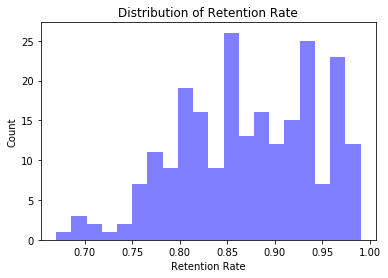

In [75]:
# Histogram of Retention Rate
plt.hist(df_retention['RetentionRate'], bins = 20,facecolor='blue', alpha=0.5)
plt.xlabel('Retention Rate')
plt.ylabel('Count')
plt.title('Distribution of Retention Rate')


In [76]:
# show the info of retention rate
print([df_retention['RetentionRate'].describe()])


[count    229.000000
mean       0.871703
std        0.071648
min        0.670000
25%        0.820000
50%        0.870000
75%        0.930000
max        0.990000
Name: RetentionRate, dtype: float64]


From this plot, the retention rates between 0.75 and 0.99 were quite frequent. The smallest number of retention rate was about 99% and the largest was about 67%. The histogram is slightly skewed to the right, or positively skewed.


#### 4.3:  Question 1: Private or Public, whose retention rate is higher?
There are many statements like public colleges have worse first-year retention in the US. Scott White, Director of Guidance at Montclair High School, said "Public colleges always have lower rates due to their mission. They have more students who drop out for economic reasons." Whether data analysis of our dataset matches his view will be the first task, to figure out whose retention performance is better, private or public?

#### 4.3a Data Summary
The dataset contains 229 rows and 2 attributes. These attributes are:<br>
* RetentionRate: Average of first-year student retention rate for each school. Type is numerical and continuous.<br>
* PublicPrivate: School type which is public or private. Type is nominal.<br>

#### 4.3b Data Analysis

In [77]:
# Count the numbers of public colleges and private ones
df_retention['PublicPrivate'].value_counts()

public     132
private     97
Name: PublicPrivate, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

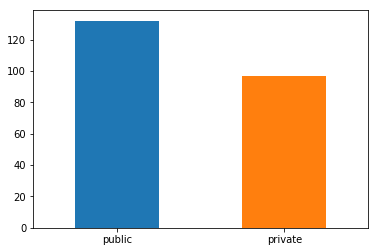

In [78]:
# Use bar chart to show the numbers of public colleges and private ones
df_retention['PublicPrivate'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

There are 132 public schools and 97 private ones in our dataset, nearly half and half, which is a balanced ratio for the data.

In [79]:
# calculate the min, mean, and max values for public colleges and private ones
df_retention.groupby('PublicPrivate')['RetentionRate'].agg(['min', 'mean','max']).transpose()

PublicPrivate,private,public
min,0.700000,0.67000
mean,0.893711,0.85553
max,0.990000,0.97000


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

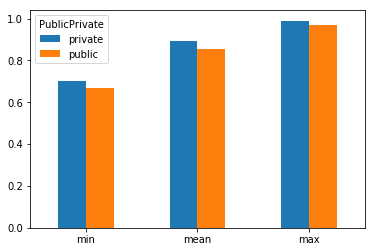

In [80]:
# use bar chart to show the case
df_retention.groupby('PublicPrivate')['RetentionRate'].agg(['min', 'mean','max']).transpose().plot(kind='bar')
plt.xticks(rotation=0)

#### Result: 
* The retention rate of private colleges is a little bit higher than public ones, no matter in minimum, mean, or maximum. But the difference between those is very very small. So the answer for the question is that the retention rate of private colleges is higher than that of public ones.

#### 4.4: Question 2: How financial resources and student cost affact retention rate?
In the financial section, most people think that financial assistance coming from schools is good for students, and it can increase retention rate; on the other hand, the academic year cost including tuition fee will bring stress to the students, which can decrease retention rate. Here we are going to verify whether they are right or not.
#### 4.4a Data Summary
The dataset contains 229 rows and 3 attributes. These attributes are:<br>
* RetentionRate: Average of first-year student retention rate of each school. Type is numerical and continuous.<br>
* Financialresourcesrank: the rank of the financial resource of each school. Type is numerical and integer.<br>
* Cost.Academic_year: student cost in the academic year. Type is numerical and integer.

In [81]:
# create a sub dataset to store the variables we use
df_retention_2 = df_retention.loc[:, ['RetentionRate','Financialresourcesrank','Cost.Academic_year']].copy()
df_retention_2.describe()

,RetentionRate,Financialresourcesrank,Cost.Academic_year
count,229.000000,229.000000,229.000000
mean,0.871703,117.685590,38253.851528
std,0.071648,72.951359,17431.423463
min,0.670000,1.000000,16078.000000
25%,0.820000,56.000000,23818.000000
50%,0.870000,115.000000,29626.000000
75%,0.930000,166.000000,56701.000000
max,0.990000,296.000000,70100.000000


* RetentionRate: The mean of the retention attribute is 0.871 while the median is 0.870. Since the median is less than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since the minimum value is at 0.67 while the max is at 0.99. However, by looking at the standard deviation, the observations seem to be not as far from its mean.
* Financialresourcesrank: The mean of the Financial resources rank attribute is 117.685 while the median is 115. Since the median is less than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since the minimum value is at 1 while the max is at 296.
* Cost.Academic_year: The mean of the retention attribute is 38253.851 while the median is 29626. Since the median is less than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is very wide since the minimum value is at 29626 while the max is at 70100.

#### 4.4b Financial Resources Rank vs. Retention Rate

Text(0, 0.5, 'Retention Rate')

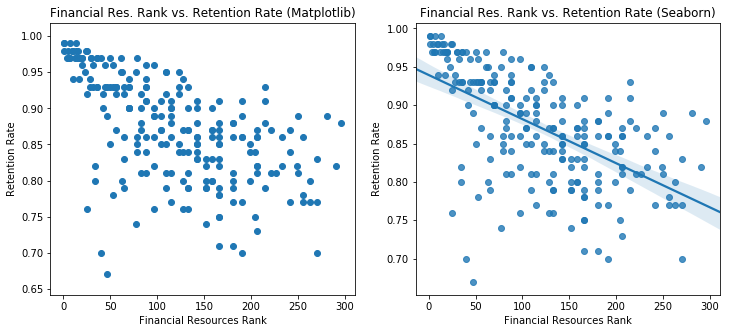

In [82]:
# Use scatterplots to display the relationship between Financial Resources Rank and Retention Rate
# side-by-side scatterplots Matplotlib and Seaborn
plt.figure(figsize=(12,5))

#plots volume vs rings using matplotlib
plt.subplot(121)
plt.scatter(x='Financialresourcesrank', y='RetentionRate', data=df_retention)
plt.title('Financial Res. Rank vs. Retention Rate (Matplotlib)')
plt.xlabel('Financial Resources Rank')
plt.ylabel('Retention Rate')

#plots volume vs rings using seaborn
plt.subplot(122)
sns.regplot(x = 'Financialresourcesrank',y = 'RetentionRate', data =df_retention)
plt.title('Financial Res. Rank vs. Retention Rate (Seaborn)')
plt.xlabel('Financial Resources Rank')
plt.ylabel('Retention Rate')

Result:
* From the Financial Rank vs. Retention Rate scatterplot, in general, the retention rate tends to decrease as the school financial resource rank number increases, which means the financial resource support becomes weak.
* There are a lot of outliers in the graph, as you can see some dots on the left of the bottom. Although these schools' ranks are good, less than 50, the retention rate is as low as under 0.7.
* When the schools' financial resource rank is greater than 250, their retention rates are all under 0.9.
* In total, the higher the financial resource rank is, the more likely the school is going to get a higher retention rate. So what most people's view that more financial resource support brings a higher retention rate is correct.

#### 4.4c One-Year Cost vs. Retention Rate

Text(0, 0.5, 'Retention Rate')

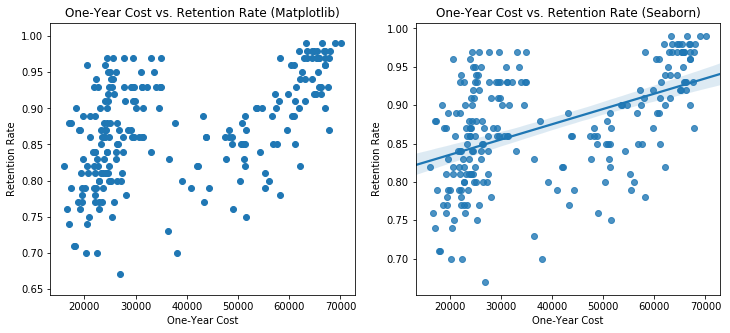

In [83]:
# Use scatterplots to display the relationship between One-Year Cost and Retention Rate
# side-by-side scatterplots Matplotlib and Seaborn
plt.figure(figsize=(12,5))

#plots whole weight vs rings using matplotlib
plt.subplot(121)
plt.scatter(x='Cost.Academic_year', y='RetentionRate', data=df_retention)
plt.title('One-Year Cost vs. Retention Rate (Matplotlib)')
plt.xlabel('One-Year Cost')
plt.ylabel('Retention Rate')

#plots whole weight vs rings using seaborn
plt.subplot(122)
sns.regplot(x = 'Cost.Academic_year',y ='RetentionRate', data =df_retention)
plt.title('One-Year Cost vs. Retention Rate (Seaborn)')
plt.xlabel('One-Year Cost')
plt.ylabel('Retention Rate')

Result:
* The point distribution in the figure is very scattered. But as we see, when the one-year student cost is higher than 45,000 dollars per year the retention rates tend to be higher than those whose costs are lower than 45,000 dollars per year. At least, most of those schools whose costs beyond 60,000 dollars have retention rate much higher than 0.90. On the other hand, if we look at the situation that retention rate below 0.85, a large proportion of schools go with a lower cost, which is less than 30,000 dollars per year.
* As I said in the question 2 introduction, most people including me think that the academic year cost will bring economic stress to the students so that it can decrease retention rate. However, the result generated by the dataset is the opposite of what we think. The reality is that a higher academic year cost goes with a higher retention rate.
* In my opinion, the real reason may be that only some top universities charge very high tuition, like some private schools, and their students are more willing to keep studying for the second year. Besides, students who can afford the high cost are more likely to come from middle class or upper class, so they don't need to worry about the cost, and they have more time and energy to spend on the study.

In [84]:
# use corrcoef function to generate the correlation coefficient
np.corrcoef(df_retention['Cost.Academic_year'],df_retention['RetentionRate'])

array([[1.        , 0.48490145],
       [0.48490145, 1.        ]])

In [85]:
# use pearsonr function to generate the correlation coefficient
from scipy.stats.stats import pearsonr   
a = df_retention['RetentionRate']
b = df_retention['Cost.Academic_year']   
pearsonr(a,b)

(0.4849014544423132, 6.5926858959884484e-15)

Result:
* From the two ways to generate the correlation coefficients between one-year cost and retention rate, the results are the same, which is 0.4849. So they have a moderate positive relationship.

#### 4.5: Question 3: Build a prediction model for retention rate.
Many variables appear to be critical factors to college first-year retention rate, such as SAT/ACT score, overall score of the universities, private or public, faculty-student ratio, cost of acdemic year. But which are the most useful ones to be used in the prediction model?
#### 4.5a Data Summary
The dataset contains 229 rows and 7 attributes. These attributes are:<br>
* RetentionRate: Average of first year student retention rate of each school. Type is numerical and continuous.<br>
* OverallScore: Scores each college get from US News. Type is numerical and integer.<br>
* PeerAssessmentScore: Scores each college get from other colleges. Type is numerical and continuous.<br>
* ACT_Med: Admission ACT middle point number.Type is numerical and continuous.<br> 
* SAT_AVG: Admission SAT average number.Type is numerical and continuous.<br>
* One-year Cost: student cost in academic year. Type is numerical and integer.<br> 
* Stu_Fac_Ratio: Student-faculty ratio.Type is numerical and integer.

In [86]:
# create a new dataset df_retention_3 for this research
df_retention_3 = df_retention[['RetentionRate', 'OverallScore', 'PeerAssessmentScore',
                               'Admissions.ACT.midpoint.cumulative', 'Admissions.SAT.avg',
                               'Cost.Academic_year', 'Stu_Fac_Ratio']].copy()

# change some columns' names
df_retention_3=df_retention_3.rename(columns = {'Admissions.ACT.midpoint.cumulative': 'ACT_Med',
                        'Admissions.SAT.avg': 'SAT_AVG',
                        'Cost.Academic_year': 'One-year Cost'})
df_retention_3.head()

,RetentionRate,OverallScore,PeerAssessmentScore,ACT_Med,SAT_AVG,One-year Cost,Stu_Fac_Ratio
0,0.98,100,4.9,34.0,1493.0,61860.0,5
1,0.97,96,4.9,34.0,1506.0,64400.0,6
2,0.99,94,4.7,34.0,1496.0,69021.0,6
3,0.99,94,4.9,34.0,1519.0,63250.0,3
4,0.99,94,4.6,34.0,1508.0,70100.0,5


In [87]:
# check dataset column names
df_retention_3.columns

Index(['RetentionRate', 'OverallScore', 'PeerAssessmentScore', 'ACT_Med',
       'SAT_AVG', 'One-year Cost', 'Stu_Fac_Ratio'],
      dtype='object')

#### 4.5b Correlation coefficient

In [88]:
# first, apply a correlation coefficient analysis to see which independent variables are more important
corr = df_retention_3.corr()
corr.style.background_gradient(cmap='coolwarm')

,RetentionRate,OverallScore,PeerAssessmentScore,ACT_Med,SAT_AVG,One-year Cost,Stu_Fac_Ratio
RetentionRate,1,0.890214,0.795343,0.853479,0.845336,0.484901,-0.353811
OverallScore,0.890214,1,0.914943,0.908741,0.914678,0.59348,-0.533084
PeerAssessmentScore,0.795343,0.914943,1,0.843117,0.855296,0.357681,-0.343473
ACT_Med,0.853479,0.908741,0.843117,1,0.984443,0.591716,-0.493418
SAT_AVG,0.845336,0.914678,0.855296,0.984443,1,0.58917,-0.50047
One-year Cost,0.484901,0.59348,0.357681,0.591716,0.58917,1,-0.758778
Stu_Fac_Ratio,-0.353811,-0.533084,-0.343473,-0.493418,-0.50047,-0.758778,1


Result:

We only care about the relations between the retention rate with any other variable. So the highest correlation with retention rate is the overall score, which is 0.89. Overall score, ACT_Med, and SAT_AVG have correlation score over 0.84. One-year cost only has a correlation score of 0.48, and the student-faculty ratio has one of -0.35, which means the lower the ratio is, the higher retention rate is.

#### 4.5c Multiple Linear regression
There is more than one feature for this study, so we conducted multiple linear regression to predict the dependent variable:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. $\beta_0$, $\beta_1$...$\beta_n$ are called the model coefficients. 

1) Build Model with all 6 Predictors by using Statsmodels and SCIKIT-LEARN.

In [90]:
# here we have 6 variables for the first multiple regression
X = df_retention_3[['OverallScore', 'PeerAssessmentScore', 'ACT_Med', 'SAT_AVG', 'One-year Cost', 'Stu_Fac_Ratio']]
# here is response variable
y = df_retention_3['RetentionRate']
# adding a constant
X = sm.add_constant(X) 

model_1 = sm.OLS(y, X).fit()
predictions = model_1.predict(X)

# displays a comprehensive table with statistical info generated by statsmodels
print_model = model_1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          RetentionRate   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.26e-86
Time:                        18:19:40   Log-Likelihood:                 491.31
No. Observations:                 229   AIC:                            -968.6
Df Residuals:                     222   BIC:                            -944.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5683    

The total ajusted R-squared is 0.839, which is good. But the P value of SAT_AVG and One-year Cost are greater than 0.05, which means these two variables are not suitable for this model. Then we can calculate the linear regression without SAT_AVG and One-year Cost.

2) Build Model with all 4 Predictors by using Statsmodels and SCIKIT-LEARN.

In [91]:
# here we have 4 variables for multiple regression
X = df_retention_3[['OverallScore', 'PeerAssessmentScore', 'ACT_Med','Stu_Fac_Ratio']]
# here is response variable
y = df_retention_3['RetentionRate']
# adding a constant
X = sm.add_constant(X) 

model_2 = sm.OLS(y, X).fit()
predictions = model_2.predict(X)

# displays a comprehensive table with statistical info generated by statsmodels
print_model = model_2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          RetentionRate   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     297.7
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.11e-88
Time:                        18:20:10   Log-Likelihood:                 490.25
No. Observations:                 229   AIC:                            -970.5
Df Residuals:                     224   BIC:                            -953.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5441    

This model is good since all P-values for each variable are less than 0.01, which is the result we would like to find. The ajusted R-squiared is as high as 0.839, which is the same as the previous one. It indicates that the operation of removing SAT_AVG and One-year Cost is right.

In [92]:
# show the regression coefficients for variable
model_2.params

const                  0.544086
OverallScore           0.004342
PeerAssessmentScore   -0.035828
ACT_Med                0.006045
Stu_Fac_Ratio          0.003748
dtype: float64

3) Build Model with all 4 Predictors by using SCIKIT-LEARN

In [93]:
### SCIKIT-LEARN ###
import numpy as np
from sklearn import linear_model
# instantiate and fit
model_3 = linear_model.LinearRegression()
model_3.fit(X, y)

# print the coefficients
print(model_3.intercept_)
print(model_3.coef_)


0.5440862209063794
[ 0.          0.00434166 -0.03582772  0.00604492  0.00374792]


As we see, the SCIKIT-LEARN method generates the same intercept and coefficients for the same model with 4 predictors.

#### 4.5d Interpreting Model Coefficients

Interprete the OverallScore coefficient ( β1 ), 

the PeerAssessmentScore coefficient ( β2 ),

the ACT_Med ( β3 ), and the Stu_Fac_Ratio ( β4 ).


A "unit" increase in OverallScore is associated with a 0.00434166 "unit" increase in first-year retention rate.

A "unit" increase in PeerAssessmentScore is associated with a 0.03582772 "unit" decrease in first-year retention rate. 

A "unit" increase in ACT_Med is associated with a 0.00604492 "unit" increase in first-year retention rate.

A "unit" increase in Stu_Fac_Ratio is associated with a 0.00374792 "unit" increase in first-year retention rate. 

Increases in OverallScore, ACT_Med and Stu_Fac_Ratio correspond to an increase of retention rate. For PeerAssessmentScore, the highest likelihood of having a highest retention rate corresponds to the lowest of PeerAssessmentScore, since the coefficient is negative.

#### 4.5e Equation of the retention rate.
 Retention rate = 0.5441 + 0.0043 * OverallScore - 0.0358 * PeerAssessmentScore + 0.006 * ACT_Med + 0.0037 * Stu_Fac_Ratio
 
A multiple linear regression was run to predict retention rate from OverallScore, PeerAssessmentScore, ACT_Med and Stu_Fac_Ratio. These variables statistically significantly predicted retention rate, p < 0.05, ajusted R2 = 0.839. All four variables explain 83.9% of the variability of the dependent variable - retention rate.

#### 4.5f Model Evaluation Using Train/Test Split
Evaluate the model by splitting into train and test sets.<br>
Now we use the train_test_split function in order to make the split. The test_size=0.4 inside the function indicates the percentage of the data that should be held over for testing. It’s 60/40, 40% of the data for testing. We fit the model on the training data.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate model
model_3 = LinearRegression()

# Fit model
model_3.fit(X_train, y_train)

# Predict
predictions = model_3.predict(X_test)

Mean Squared Error (MSE) is the mean of the squared errors.<br>
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# MSE
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

(137, 7)
(137,)
(92, 7)
(92,)
MSE: 0.0008581701204907885
RMSE: 0.029294540796721637


Text(0, 0.5, 'Predictions')

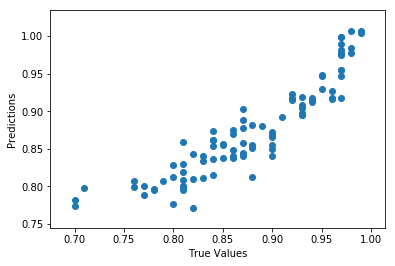

In [103]:
#visualise the prediction
plt.scatter(y_test,predictions)

plt.xlabel('True Values')
plt.ylabel('Predictions')

#### 4.5g Measure the execution time of regression

In [164]:
# use start time and end time to calculate the execution time
import time
start = time.time()

# here we have 4 variables for multiple regression
X = df_retention_3[['OverallScore', 'PeerAssessmentScore', 'ACT_Med','Stu_Fac_Ratio']]
# here is response variable
Y = df_retention_3['RetentionRate']
# adding a constant
X = sm.add_constant(X) 

model_2 = sm.OLS(Y, X).fit()
predictions = model_2.predict(X)

end = time.time()
print("Result: The execution time is",end - start,"second.")

Result: The execution time is 0.008845090866088867 second.


In [162]:
# use start time and end time to calculate the execution time
start = time.time()

# here we have 6 variables for multiple regression
X = df_retention_3[['OverallScore', 'PeerAssessmentScore', 'ACT_Med', 'SAT_AVG', 'One-year Cost', 'Stu_Fac_Ratio']]
# here is response variable
Y = df_retention_3['RetentionRate']
# adding a constant
X = sm.add_constant(X) 

model_1 = sm.OLS(Y, X).fit()
predictions = model_1.predict(X)

end = time.time()
print("Result: The execution time is",end - start,"second, which is a little greater than the above number.")


Result: The execution time is 0.00978994369506836 second, which is a little greater than the above number.


### 4.6: Conclusion
1. The retention rate of private colleges is a little bit higher than public ones. But the difference between those is very very small.
2. The higher the financial resource rank is, the more likely the school is going to get a higher retention rate.
3. In general, a higher academic year cost goes with a higher retention rate. The correlation coefficient between the one-year cost and retention rate is 0.4849. So they have a moderate positive relationship.
4. Apply OLS regression method to generate the equation of the retention rate:

 Retention rate = 0.5441 + 0.0043 * OverallScore - 0.0358 * PeerAssessmentScore + 0.006 * ACT_Med + 0.0037 * Stu_Fac_Ratio
5. Measure the execution time of regression. The execution time of model_2 multiple linear regression is 0.0059 second.

------------------

### V. Graduation Rate

By Yunxiang Wang

#### Introduction

In the ‘U.S. News & World Report – Best National Universities’, they take graduation rate into consideration, which totally occupies 8% weight (1). That means that graduation rate can affect the college rankings directly. But what affects graduation rate? 

Among the top 50 universities in the United States, Princeton and Yale have the highest graduation rates (97%), followed by Dartmouth (96%). University of Texas has the lowest graduation rate, at 83%. University of Texas has 17% of students who can't graduate, but that's not to say that the school's teaching quality is poor. Therefore, we need to take into account the school resources, student/faculty ratio or students'self-effort. From this we can see that there is more than one factor affecting the graduation rate.

Here we prepared some questions to see the phenomenon between graduation rates and factors and find influencing factors of graduation rates. We would refer to 2019 U.S. News & World Report – Best National Universities and IPEDS. 

Generally speaking, if a school ranks better, the higher the SAT scores of students and the higher the student/faculty ratio, the higher the graduation rate of students. In terms of the type of school, we will also consider the fairness factor, so the graduation rate of public schools is higher. To verify the above hypothesis, we propose the following question

#### Questions :
1:Does university rank( or Overall Score ) affect graduation rate?

2:Is there a difference between graduation rates of public universities and the rates of private universities?

3:What is the relationship between student/faculty ratio and rank?

4:How does the school require SAT score for the graduation rate?

5:What is the impact of Cost on school graduation rates?

6: With the above analysis, can we predict the graduation rate of each school?

####  Choose data

Data Set Information: The set includes 8 columns that will be used into the graduation rate.Actually, in these columns, we will analyze the relation of 'OverallScore', 'PublicPrivate','Stu_Fac_Ratio',  'Admissions.SAT.avg', 'Cost.Academic_year' and 'Actualgraduationrate'. In the overall sense, the 'rank' columns can be represented by the 'OverallScore',but the order of the two columns are totally opposite. We will use the 'OverallScore' but not 'rank',in order to analyze conveniently.

In [125]:
#get the target set

grad_df=df01[['rank','school','PublicPrivate','OverallScore', 
            'Actualgraduationrate','Stu_Fac_Ratio',
            'Admissions.SAT.avg','Cost.Academic_year']]
grad_df.head()

,rank,school,PublicPrivate,OverallScore,Actualgraduationrate,Stu_Fac_Ratio,Admissions.SAT.avg,Cost.Academic_year
0,1,Princeton University,private,100,0.97,5,1493.0,61860.0
1,2,Harvard University,private,96,0.96,6,1506.0,64400.0
2,3,Columbia University,private,94,0.96,6,1496.0,69021.0
3,3,Massachusetts Institute of Technology,private,94,0.94,3,1519.0,63250.0
4,3,University of Chicago,private,94,0.93,5,1508.0,70100.0


In [127]:
#checking the number of rows and columns
grad_df.shape

(229, 8)

In [128]:
#identifying missing values, displaying the columns that have null values
grad_df.isnull().any(axis=0)

rank                    False
school                  False
PublicPrivate           False
OverallScore            False
Actualgraduationrate    False
Stu_Fac_Ratio           False
Admissions.SAT.avg      False
Cost.Academic_year      False
dtype: bool

In [129]:
#get subsetdata information
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 8 columns):
rank                    229 non-null int64
school                  229 non-null object
PublicPrivate           229 non-null object
OverallScore            229 non-null int64
Actualgraduationrate    229 non-null float64
Stu_Fac_Ratio           229 non-null int8
Admissions.SAT.avg      229 non-null float64
Cost.Academic_year      229 non-null float64
dtypes: float64(3), int64(2), int8(1), object(2)
memory usage: 14.5+ KB


In [130]:
#get subsetdata description
grad_df.describe()

,rank,OverallScore,Actualgraduationrate,Stu_Fac_Ratio,Admissions.SAT.avg,Cost.Academic_year
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,113.065502,50.545852,0.721747,14.834061,1205.593886,38253.851528
std,65.608021,17.810500,0.139622,4.660253,137.682849,17431.423463
min,1.000000,26.000000,0.390000,3.000000,907.000000,16078.000000
25%,56.000000,36.000000,0.610000,12.000000,1091.000000,23818.000000
50%,115.000000,48.000000,0.710000,16.000000,1185.000000,29626.000000
75%,171.000000,61.000000,0.830000,18.000000,1289.000000,56701.000000
max,226.000000,100.000000,0.970000,30.000000,1555.000000,70100.000000


Our subset contains 229 rows and 8 columns withou null. In the 229 datas, all are numerics except 'school' and 'PublicPrivate' columns. Hence, we will replace 'PublicPrivate' by dummies in the following analysis. 

#### Question1: Does university rank( or Overall Score ) affect graduation rate?

We refered to the website as following:https://www.usnews.com/education/best-colleges/articles/how-us-news-calculated-the-rankings. Among the top 50 universities in the United States, Princeton and Yale have the highest graduation rates (97%), followed by Dartmouth (96%). University of Texas has the lowest graduation rate, at 83%. Next, we need to make a regression chart to determine whether the graduation rate is related to the ranking.


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'OverallScore vs. Graduation rate')

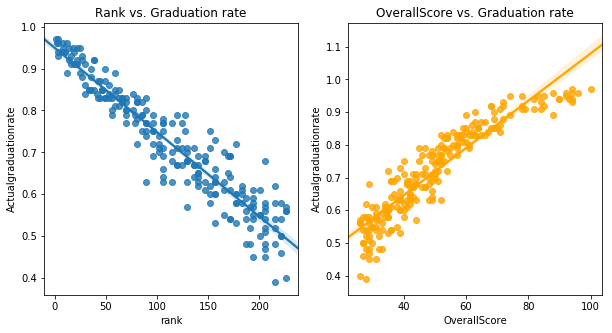

In [131]:
# generate a regression plot using Seaborn

# define a new figure for plotting
plt.figure(figsize=(10,5))

# use Seaborn's regplot() function to plot the regression line for 
# the Rank vs. Graduation rate
plt.subplot(121)
sns.regplot( 'rank','Actualgraduationrate',data=grad_df)
plt.title('Rank vs. Graduation rate')
# use Seaborn's regplot() function to plot the regression line for 
# the OverallScore vs. Graduation rate
plt.subplot(122)
sns.regplot( 'OverallScore','Actualgraduationrate',data=grad_df,color='orange')
# give the plot a title using Matplotlib
plt.title('OverallScore vs. Graduation rate')

Logically, because ‘rank’ and 'OverallScore' are in reverse order, they should show the opposite trend with respect to 'Actualgraduationrate', which is inverse. Actually,they are also inversely proportional. From the graph, 'rank' and 'Actualgraduationrate' are in an inverse trend, but 'OverallScore' and 'Actualgraduationrate' are in a positive trend. All data points tend to go back to the regression line, and the effect of regression is great.

In [132]:
# import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

y=grad_df['Actualgraduationrate']
X=grad_df['OverallScore']

# now instead of using np.dot, use statsmodels' OLS() function to fit
# an ordinary least squares regression equation to our random data
model = sm.OLS(y, X)

# now get the results of the regression
results = model.fit()

# check the regression coefficients for variable
results.params

OverallScore    0.013504
dtype: float64

In [133]:
# print the detailed diagnostic data for the model
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Actualgraduationrate   R-squared:                       0.969
Model:                              OLS   Adj. R-squared:                  0.969
Method:                   Least Squares   F-statistic:                     7080.
Date:                  Sun, 05 May 2019   Prob (F-statistic):          1.15e-173
Time:                          18:42:11   Log-Likelihood:                 142.56
No. Observations:                   229   AIC:                            -283.1
Df Residuals:                       228   BIC:                            -279.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallScore     0.0135     

#### Intepreting the Model  OLS() Function
- __Adjusted__ $R^2$/$R^2$: According to the study above, it shows $R^2$ and __Adjusted__ $R^2$ is 0.969 that can be regarded as "Goodness of fit". 

- __F Statistic__: Indicates whether a significant amount of variance in the response variable $y'$ is explained by the model. In our case the nummber is 7080 which is high,  the model is good. 


- __Log Likelihood__: A measure of how well a model fits the underlying data.  __Log Likelihood__ score is 142.56, to some extend, we can think that it is great. 

- __p values__:In our case the __p value__  is 0.013 that not exceed 0.05, hence ,we have great confidence to consider 'OverallScore' can be a factor of'Actualgraduationrate'.

Through the above data analysis, we have reason to believe that ‘OverallScore'  can be used to predict 'Actualgraduationrate', which will be shown in the analysis later.


#### Question2: Is there a difference between graduation rates of public universities and the rates of private universities?

In this section, we will make a comparison between the two types of schools. In addition, we will introduce virtual data to facilitate the subsequent regression model building.

In [134]:
# Use groupby function to make a new dataframe.
grad_df.groupby(grad_df['PublicPrivate']).count().sort_values(by='OverallScore', ascending=False)

,rank,school,OverallScore,Actualgraduationrate,Stu_Fac_Ratio,Admissions.SAT.avg,Cost.Academic_year
PublicPrivate,,,,,,,
public,132,132,132,132,132,132,132
private,97,97,97,97,97,97,97


(array([0, 1]), <a list of 2 Text xticklabel objects>)

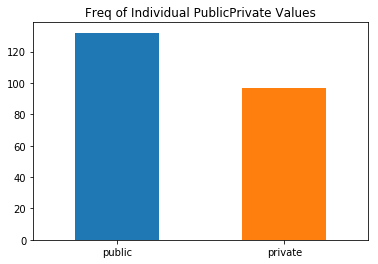

In [135]:
# Make a bar plot of the PublicPrivate data.
grad_df['PublicPrivate'].value_counts().plot.bar(title="Freq of Individual PublicPrivate Values")
plt.xticks(rotation=0)

In [136]:
#get dummies data in PublicPrivate column
grad_df1 = grad_df.join(pd.get_dummies(grad_df.PublicPrivate))
grad_df1.head()

,rank,school,PublicPrivate,OverallScore,Actualgraduationrate,Stu_Fac_Ratio,Admissions.SAT.avg,Cost.Academic_year,private,public
0,1,Princeton University,private,100,0.97,5,1493.0,61860.0,1,0
1,2,Harvard University,private,96,0.96,6,1506.0,64400.0,1,0
2,3,Columbia University,private,94,0.96,6,1496.0,69021.0,1,0
3,3,Massachusetts Institute of Technology,private,94,0.94,3,1519.0,63250.0,1,0
4,3,University of Chicago,private,94,0.93,5,1508.0,70100.0,1,0


In [137]:
#  group the 'Actualgraduationrate'based on the contents of the 'public' and 'private'
dummies=grad_df1['Actualgraduationrate'].groupby([grad_df1['private'], grad_df1['public']])

# display summary statistics for the groupings
dummies.describe()

,,count,mean,std,min,25%,50%,75%,max
private,public,,,,,,,,
0,1,132.0,0.677652,0.129808,0.39,0.57,0.67,0.79,0.95
1,0,97.0,0.781753,0.130360,0.50,0.68,0.80,0.90,0.97


From the above analysis, it is not difficult to see that 132 public schools rank the highest in the United States than 97 private schools. On the average graduation rate, private schools are about 78% higher than public schools. It can be seen that the type of school will also have a certain impact on the graduation rate. In the subsequent regression model, we will use the "private" column in the virtual variable to distinguish the types of schools.

#### Questions 3:  What is the relationship between student/faculty ratio and rank?

In terms of data cleaning, we have converted the student/faculty ratio into numbers. In this part of our work, we will analyze the current ratio of the United States and its relationship with ranking and graduation rates.

In [138]:
# split the Distance column into 3 separate bins (one for each day)
distbins = pd.cut(grad_df.Stu_Fac_Ratio, 10, precision = 0)
distbins[:10]

0    (3.0, 6.0]
1    (6.0, 8.0]
2    (6.0, 8.0]
3    (3.0, 6.0]
4    (3.0, 6.0]
5    (6.0, 8.0]
6    (3.0, 6.0]
7    (6.0, 8.0]
8    (6.0, 8.0]
9    (6.0, 8.0]
Name: Stu_Fac_Ratio, dtype: category
Categories (10, interval[float64]): [(3.0, 6.0] < (6.0, 8.0] < (8.0, 11.0] < (11.0, 14.0] ... (19.0, 22.0] < (22.0, 25.0] < (25.0, 27.0] < (27.0, 30.0]]

In [139]:
# define a function that specifies the aggregating functions we want to apply
# to the 'Stu_Fac_Ratio' values contained within each of our Dist binning cuts
# Note the use of a dict object
def get_stats(group):
    return {'Min Stu_Fac_Ratio': group.min(), 'Max Stu_Fac_Ratio': group.max(),
            'Count': group.count(), 'Average Stu_Fac_Ratio': group.mean()}

In [140]:
# group the grad_df column's values relative to the Dist binning cuts we made above
grouped = grad_df.Stu_Fac_Ratio.groupby(distbins)

# In the results we see the data1 quartile cuts are used as the row index labels
grouped.apply(get_stats).unstack()

,Average Stu_Fac_Ratio,Count,Max Stu_Fac_Ratio,Min Stu_Fac_Ratio
Stu_Fac_Ratio,,,,
"(3.0, 6.0]",4.000000,5.0,5.0,3.0
"(6.0, 8.0]",6.888889,18.0,8.0,6.0
"(8.0, 11.0]",9.967742,31.0,11.0,9.0
"(11.0, 14.0]",12.666667,33.0,13.0,12.0
"(14.0, 16.0]",15.022222,45.0,16.0,14.0
"(16.0, 19.0]",17.815385,65.0,19.0,17.0
"(19.0, 22.0]",20.210526,19.0,21.0,20.0
"(22.0, 25.0]",22.600000,10.0,24.0,22.0
"(25.0, 27.0]",26.000000,2.0,27.0,25.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Stu_Fac_Ratio vs. OverallScore')

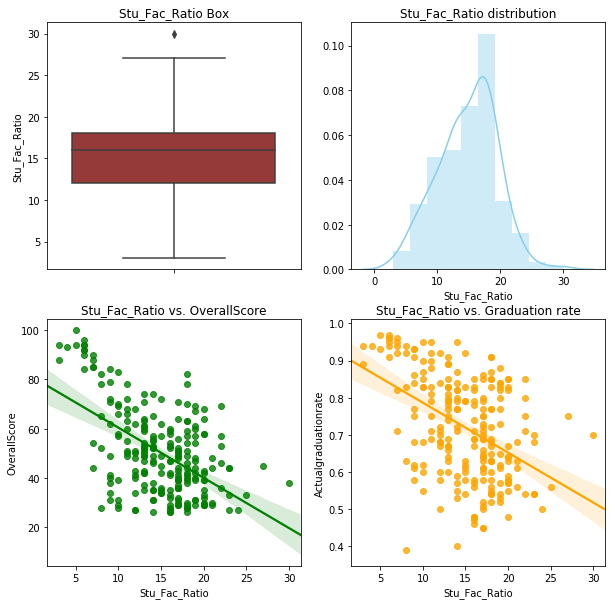

In [141]:
# generate a regression plot using Seaborn

# first define a Matplotlib figure
plt.figure(figsize=(10,10))

# plot a box plot
plt.subplot(221)
sns.boxplot(grad_df['Stu_Fac_Ratio'], orient = 'v',color='brown');
# give the plot a title using Matplotlib
plt.title('Stu_Fac_Ratio Box')

# plot a box plot
plt.subplot(222)
sns.distplot(grad_df["Stu_Fac_Ratio"],bins=10,color='skyblue');
# give the plot a title using Matplotlib
plt.title('Stu_Fac_Ratio distribution')

# use Seaborn's regplot() function to plot the regression line for the Stu_Fac_Ratio
plt.subplot(224)
sns.regplot( 'Stu_Fac_Ratio','Actualgraduationrate',data=grad_df,color='orange')
# give the plot a title using Matplotlib
plt.title('Stu_Fac_Ratio vs. Graduation rate')


# use Seaborn's regplot() function to plot the regression line for the Stu_Fac_Ratio
plt.subplot(223)
sns.regplot( 'Stu_Fac_Ratio','OverallScore',data=grad_df,color='green')
# give the plot a title using Matplotlib
plt.title('Stu_Fac_Ratio vs. OverallScore')

The above analysis shows that the existing student/faculty ratio is concentrated between 16 and 19, and 65 schools have such a student/faculty ratio. According to 'Stu_Fac_Ratio distribution',it looks like a normal distribution.

It is inversely proportional to OverallScore or graduation rate, and the trends are highly similar. This means that the higher the graduation rate, the lower the student/faculty ratio; the better the school Overall Score, the lower the student/faculty ratio.


#### Question 4: Can the SAT be used as an indicator of the graduation rate?

The SAT score is an important indicator of student performance in school and can be used as an important reference for students to graduate. We can do some EDA:

In [142]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def draw_moving(timeSeries, size):
    
    rol_mean = timeSeries.rolling(window=size).mean()
    timeSeries.plot(color='black', label='Original')
    rol_mean.plot(color='brown', label='Rolling Mean')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    

Text(0.5, 1.0, 'Volatility of SAT')

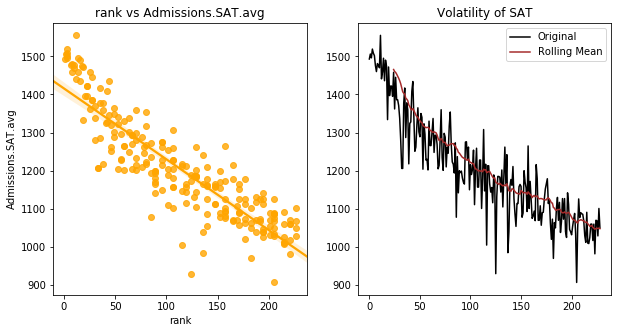

In [143]:
# first define a Matplotlib figure
plt.figure(figsize=(10,5))

# use Seaborn's regplot() function to plot the regression line for the SAT
plt.subplot(121)
# generate a regression plot using Seaborn
sns.regplot( 'rank','Admissions.SAT.avg',data=grad_df,color='orange')
# give the plot a title using Matplotlib
plt.title('rank vs Admissions.SAT.avg')

# use definition function to plot the trend line for the SAT and violation
plt.subplot(122)
draw_moving(grad_df['Admissions.SAT.avg'],25)
# give the plot a title using Matplotlib
plt.title('Volatility of SAT')

In [144]:
y=grad_df['Actualgraduationrate']
X=grad_df['Admissions.SAT.avg']

# now instead of using np.dot, use statsmodels' OLS() function to fit
# an ordinary least squares regression equation to our random data
model = sm.OLS(y, X)

# now get the results of the regression
results = model.fit()

# check the regression coefficients for variable
results.params

Admissions.SAT.avg    0.000602
dtype: float64

In [145]:
# print the detailed diagnostic data for the model
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Actualgraduationrate   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.988
Method:                   Least Squares   F-statistic:                 1.854e+04
Date:                  Sun, 05 May 2019   Prob (F-statistic):          2.28e-220
Time:                          18:47:15   Log-Likelihood:                 250.56
No. Observations:                   229   AIC:                            -499.1
Df Residuals:                       228   BIC:                            -495.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Admissions.SAT.a

The above analysis shows that the school rankings are inversely proportional to the SAT scores. Moreover, the volatility of the SAT is relatively small. After the regression analysis is completed, the regression effect is also good (this will be carefully analyzed later). So consider it as an indicator of graduation rate.

However, the graduation rate and the measurement unit of the SAT are too different. We consider using the logarithm of the SAT to return.

#### Question 5: What is the impact of Cost on school graduation rates?

Cost of Academic year, as an important factor, should have been taken into account. But we will analyze why Cost of Academic year is not considered as one of the factors of graduation rate in this section.

First, we take OLS modle to regress the cost and graduation rate.


In [146]:
y=grad_df['Actualgraduationrate']
X=grad_df['Cost.Academic_year']
# get the results of the regression
model = sm.OLS(y, X)
results = model.fit()

# check the regression coefficients for variable
results.params

Cost.Academic_year    0.000016
dtype: float64

In [147]:
# print the detailed diagnostic data for the model
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Actualgraduationrate   R-squared:                       0.882
Model:                              OLS   Adj. R-squared:                  0.881
Method:                   Least Squares   F-statistic:                     1703.
Date:                  Sun, 05 May 2019   Prob (F-statistic):          9.34e-108
Time:                          18:48:36   Log-Likelihood:                -9.8190
No. Observations:                   229   AIC:                             21.64
Df Residuals:                       228   BIC:                             25.07
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cost.Academic_ye

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Volatility of cost')

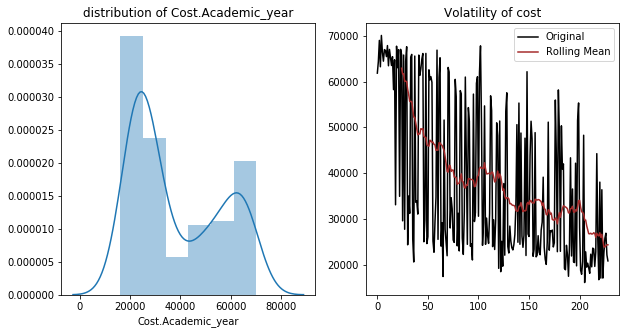

In [148]:
# first define a Matplotlib figure
plt.figure(figsize=(10,5))

# use Seaborn's regplot() function to plot the regression line for the cost
plt.subplot(121)
# generate a regression plot using Seaborn
sns.distplot(grad_df["Cost.Academic_year"])
# give the plot a title using Matplotlib
plt.title('distribution of Cost.Academic_year')

# use definition function to plot the trend line for the SAT and violation
plt.subplot(122)
draw_moving(grad_df['Cost.Academic_year'],25)
# give the plot a title using Matplotlib
plt.title('Volatility of cost')

As we did above, although the value of |p|>t is very small, Log-Likelihood is not too good. The coef is also too small. In order to judge the 'Cost.Academic_year' columns as a factor of graduation rate, we did violitity analysis. The volatility graph shows that there is great difference between the actual value and regression value(the distance of black). And from the distribution chart, it is difficult to see any relationship.

So we think that taking 'Cost.Academic_year' as a consideration could not reflect the relationship between 'Cost.Academic_year' and graduation rate.


#### Question 6: With the above analysis, can we do the best graduation rate regression of each school?

#### Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:
$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$
Each $x$ represents a different feature, and each feature has its own coefficient. In this case:
$y = \beta_0 + \beta_1 \times OverallScore + \beta_2 \times log（ Admissions.SAT.avg） + \beta_3 \times StuFacRatio+ \beta_4 \times private$



In [149]:
grad_df1.columns

Index(['rank', 'school', 'PublicPrivate', 'OverallScore',
       'Actualgraduationrate', 'Stu_Fac_Ratio', 'Admissions.SAT.avg',
       'Cost.Academic_year', 'private', 'public'],
      dtype='object')

In [150]:
#use the logarithm of the SAT
grad_df1['Admissions.SAT.avg']=np.log(grad_df1['Admissions.SAT.avg'])

In [151]:
# create A and B
A = grad_df1[['OverallScore', 'Admissions.SAT.avg','Stu_Fac_Ratio','private']]
B = grad_df1['Actualgraduationrate']
# get the results of the regression
model = sm.OLS(B, A)
results = model.fit()

# check the regression coefficients for variable
results.params

OverallScore          0.007296
Admissions.SAT.avg    0.037214
Stu_Fac_Ratio         0.004868
private               0.040125
dtype: float64

In [152]:
# print the detailed diagnostic data for the model
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Actualgraduationrate   R-squared:                       0.995
Model:                              OLS   Adj. R-squared:                  0.995
Method:                   Least Squares   F-statistic:                 1.150e+04
Date:                  Sun, 05 May 2019   Prob (F-statistic):          7.59e-259
Time:                          18:50:07   Log-Likelihood:                 355.27
No. Observations:                   229   AIC:                            -702.5
Df Residuals:                       225   BIC:                            -688.8
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
OverallScore    

#### Conclusion

In our study, we selected the factors that affect the graduation rate, and finally selected 'OverallScore', log（'Admissions.SAT.avg'）,'Stu_Fac_Ratio' and 'Privatepublic' as indicators that affects the school graduation rate. Analysis by OLS regression. Their correlation coefficients were determined to be 0.0073, 0.0372, 0.0049 and 0.0401, respectively. Compared with previous OLS models, we found that：

- $R^2$/__Adjusted__ $R^2$: In general, the larger the value of $R^2$, the more accurate the model is. In our case, both them are 0.995 that is near 1.000. We can think that it is high and the model is accurate.

- __p values__: In our case, all  __p values__  are less than 0.05, hence ,we have great confidence to consider 'OverallScore', 'Admissions.SAT.avg','Stu_Fac_Ratio',and 'PrivatePublic' can be factors of'Actualgraduationrate'.

From the above analysis, the better the school ranking, the higher the SAT score, the higher the teacher-student ratio, the higher the graduation rate; the opposite is also true. The graduation rate of private schools is also higher than that of public schools.

Because time and data are limited, we can not find all the factors that affect graduation rates. These factors are only a reference, but when choosing a school, if the graduation rate is used as a criterion for school selection, then the above factors should be carefully considered.
